In [1]:
# Dependencies
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Reading csv files
data08 = pd.read_csv('Resources/Forbes Global 2000 - 2008.csv')
data09 = pd.read_csv('Resources/Forbes Global 2000 - 2009.csv')
data10 = pd.read_csv('Resources/Forbes Global 2000 - 2010.csv')
data11 = pd.read_csv('Resources/Forbes Global 2000 - 2011.csv')
data12 = pd.read_csv('Resources/Forbes Global 2000 - 2012.csv')
data13 = pd.read_csv('Resources/Forbes Global 2000 - 2013.csv')
data14 = pd.read_csv('Resources/Forbes Global 2000 - 2014.csv')
data15 = pd.read_csv('Resources/Forbes Global 2000 - 2015.csv')
data16 = pd.read_csv('Resources/Forbes Global 2000 - 2016.csv')
data17 = pd.read_csv('Resources/Forbes Global 2000 - 2017.csv')
data18 = pd.read_csv('Resources/Forbes Global 2000 - 2018.csv', error_bad_lines=False)
data19 = pd.read_csv('Resources/Forbes Global 2000 - 2019.csv')
data20 = pd.read_csv('Resources/Forbes Global 2000 - 2020.csv')
data21 = pd.read_csv('Resources/Forbes Global 2000 - 2021.csv')

In [3]:
# Removing $ from the values
data20["Sales"] = data20["Sales"].str.replace('$','')
data20["Profits"] = data20["Profits"].str.replace('$','')
data20["Assets"] = data20["Assets"].str.replace('$','')
data20["Market Value"] = data20["Market Value"].str.replace('$','')

In [4]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data20['Sales']= data20['Sales'].replace(value,regex=True).map(pd.eval)
data20['Sales'] = round(data20['Sales'],2)
data20['Profits']= data20['Profits'].replace(value,regex=True).map(pd.eval)
data20['Profits'] = round(data20['Profits'],2)
data20['Assets']= data20['Assets'].replace(value,regex=True).map(pd.eval)
data20['Assets'] = round(data20['Assets'],2)
data20['Market Value']= data20['Market Value'].replace(value,regex=True).map(pd.eval)
data20['Market Value'] = round(data20['Market Value'],2)

In [5]:
# checking data21 - missing industry 
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Name          2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profit        2000 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  2000 non-null   object
 7   Year          2000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [6]:
# getting column names for data21
data21.columns

Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value',
       'Year'],
      dtype='object')

In [7]:
# renaming columns for data21
data21.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value',
       'Year']

In [8]:
# Removing $ from the values
data21["Sales"] = data21["Sales"].str.replace('$','')
data21["Profits"] = data21["Profits"].str.replace('$','')
data21["Assets"] = data21["Assets"].str.replace('$','')
data21["Market Value"] = data21["Market Value"].str.replace('$','')

In [9]:
# Replaced one NaN value with 0 to allow for formatting
data21 = data21.fillna(0)

In [10]:
# merging data21 with data20 to get industry column
data21_corrected = pd.merge(data21, data20, on="Company", how="left")
data21_corrected.head()

,Rank_x,Company,Country,Sales_x,Profits_x,Assets_x,Market Value_x,Year_x,Rank_y,Country/Territory,Sales_y,Profits_y,Assets_y,Market Value_y,Sector,Industry,Year_y
0,1,ICBC,China,190.5 B,45.8 B,"4,914.7 B",249.5 B,2021,1.0,China,177.2,45.3,4322.5,242.3,Financials,Major Banks,2020.0
1,2,JPMorgan Chase,United States,136.2 B,40.4 B,"3,689.3 B",464.8 B,2021,3.0,United States,142.9,30.0,3139.4,291.7,Financials,Major Banks,2020.0
2,3,Berkshire Hathaway,United States,245.5 B,42.5 B,873.7 B,624.4 B,2021,4.0,United States,254.6,81.4,817.7,455.4,Financials,Investment Services,2020.0
3,4,China Construction Bank,China,173.5 B,39.3 B,"4,301.7 B",210.4 B,2021,2.0,China,162.1,38.9,3822.0,203.8,Financials,Major Banks,2020.0
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7 B,49.3 B,510.3 B,"1,897.2 B",2021,5.0,Saudi Arabia,329.8,88.2,398.3,1684.8,Energy,Oil & Gas,2020.0


In [11]:
# grabbing the desired columns for new data21
data21_corrected = data21_corrected[['Rank_x', 'Company', 'Country', 'Sales_x', 'Profits_x', 'Assets_x',
       'Market Value_x', 'Year_x', 'Sector', 'Industry']]

In [12]:
# renaming columns for data21
data21_corrected.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Year', 'Sector', 'Industry']


In [13]:
# reassigning corrected data21 back to data21
data21 = data21_corrected

In [14]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data21['Sales']= data21['Sales'].replace(value,regex=True).map(pd.eval)
data21['Sales'] = round(data21['Sales'],2) # necessary?
data21['Profits']= data21['Profits'].replace(value,regex=True).map(pd.eval)
data21['Profits'] = round(data21['Profits'],2) # necessary?
data21['Assets']= data21['Assets'].replace(value,regex=True).map(pd.eval)
data21['Assets'] = round(data21['Assets'],2) # necessary?
data21['Market Value']= data21['Market Value'].replace(value,regex=True).map(pd.eval)
data21['Market Value'] = round(data21['Market Value'],2) # necessary?

In [15]:
# Changing 0 back to NaN value in case needed
data21.replace(0,np.nan, inplace=True)

In [16]:
# rename the columns for concat
data08.columns = ['Company', 'Industry', 'Country', 'Market Value',
       'Profits', 'Assets', 'Sales', 'Rank', 'Year']
data09.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year']
data10.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data11.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data15.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data16.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data17.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data18.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data19.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data20.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry', 'Year']

In [17]:
#combine the dataset together 
frames = [data08, data09, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21]

result = pd.concat(frames)

In [18]:
# Displaying new df
result

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Sector,Continent
0,HSBC Holdings,Banking,United Kingdom,180.81,19.13,2348.98,146.50,1.0,2008,NaN,NaN
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,NaN,NaN
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,NaN,NaN
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,NaN,NaN
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,JTEKT,Auto & Truck Parts,Japan,3.50,-0.03,25.00,13.10,1996.0,2021,Consumer Discretionary,NaN
1996,Insurance Australia Group,Property & Casualty Insurance,Australia,9.30,-0.21,7.10,5.40,1997.0,2021,Financials,NaN
1997,Sumec Corporation,NaN,China,1.30,0.08,7.50,13.00,1997.0,2021,NaN,NaN
1998,Gold Fields,NaN,South Africa,8.90,0.72,2.60,3.90,1999.0,2021,NaN,NaN


In [19]:
# find US data
us = result.loc[result["Country"] == "United States"]

In [20]:
# Removing columns
us.drop(columns=['Sector','Continent'], inplace=True)

In [21]:
# checking info on us df
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       7882 non-null   object 
 1   Industry      7600 non-null   object 
 2   Country       7882 non-null   object 
 3   Market Value  7882 non-null   float64
 4   Profits       7875 non-null   float64
 5   Assets        7881 non-null   float64
 6   Sales         7880 non-null   float64
 7   Rank          7882 non-null   float64
 8   Year          7882 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 615.8+ KB


In [22]:
# dropping null values
us.dropna(inplace = True)

In [23]:
# checking null values were successfully removed
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7591 entries, 1 to 1930
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       7591 non-null   object 
 1   Industry      7591 non-null   object 
 2   Country       7591 non-null   object 
 3   Market Value  7591 non-null   float64
 4   Profits       7591 non-null   float64
 5   Assets        7591 non-null   float64
 6   Sales         7591 non-null   float64
 7   Rank          7591 non-null   float64
 8   Year          7591 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 593.0+ KB


In [24]:
# create another df for correlation
us2 = us
us2 = us2.drop(columns = ['Rank', 'Year',])
us2

,Company,Industry,Country,Market Value,Profits,Assets,Sales
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25
...,...,...,...,...,...,...,...
1892,Fluor,Construction Services,United States,3.20,-0.44,7.30,15.70
1897,Toll Brothers,Construction Services,United States,7.50,0.49,10.90,7.30
1901,Tenneco,Auto & Truck Parts,United States,0.94,-1.50,11.90,15.40
1912,PBF Energy,Oil & Gas Operations,United States,1.70,-1.40,10.50,15.10


In [25]:
# correlation matrix and find the strongest positive and negative correlations for us. 
us_corr = us2.corr()
display(us_corr)

,Market Value,Profits,Assets,Sales
Market Value,1.000000,0.676520,0.236755,0.562013
Profits,0.676520,1.000000,0.335688,0.533418
Assets,0.236755,0.335688,1.000000,0.354140
Sales,0.562013,0.533418,0.354140,1.000000


In [26]:
# Marc will do the same for assets and sales

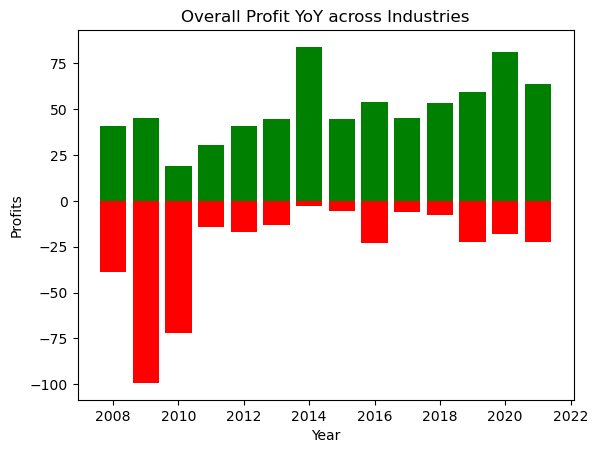

In [27]:
# plot profit YOY
plt.bar(us["Year"], us["Profits"], linewidth=1, color=(us['Profits'] > 0).map({True: 'g', False: 'r'}))
plt.title("Overall Profit YoY across Industries")
plt.xlabel("Year")
plt.ylabel("Profits") 
plt.savefig("Output/overall_profit_yoy.png")
plt.show()

In [28]:
# find the mean of each year
mean_val = us.groupby("Year").mean()
mean_val

,Market Value,Profits,Assets,Sales,Rank
Year,,,,,
2008,21.151711,1.141779,51.916611,17.105268,982.988255
2009,12.657122,0.300619,49.997905,18.271439,979.919854
2010,20.036717,0.840619,52.368649,16.767073,936.069418
2011,23.521528,1.410107,62.253138,18.760463,937.169776
2012,25.576864,1.648375,65.348566,20.739771,930.147228
2013,27.384715,1.613076,66.004972,20.701105,943.766114
2014,32.695636,2.067636,66.965818,20.779636,933.178182
2015,35.210011,1.817571,68.490333,21.221367,929.143885
2016,34.396000,1.556317,68.941546,20.211852,932.427046


In [29]:
mean_val2 = mean_val
mean_val_corr = mean_val2.corr()
display(mean_val_corr)

,Market Value,Profits,Assets,Sales,Rank
Market Value,1.000000,0.745310,0.971401,0.912535,-0.881798
Profits,0.745310,1.000000,0.785189,0.805788,-0.555580
Assets,0.971401,0.785189,1.000000,0.964387,-0.889958
Sales,0.912535,0.805788,0.964387,1.000000,-0.783729
Rank,-0.881798,-0.555580,-0.889958,-0.783729,1.000000


In [30]:
# Add to below using the raw cell

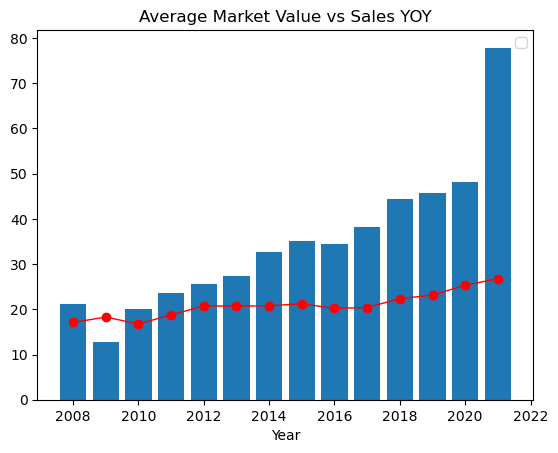

In [31]:
# maybe remove?

# plot market value vs Sales
plt.bar(mean_val.index, mean_val["Market Value"], linewidth=1)
plt.plot(mean_val.index,mean_val["Sales"], marker="o", color="red", linewidth=1)
plt.title("Average Market Value vs Sales YOY")
plt.xlabel("Year")
plt.legend('Market Value','Sales', loc="best")
plt.show()

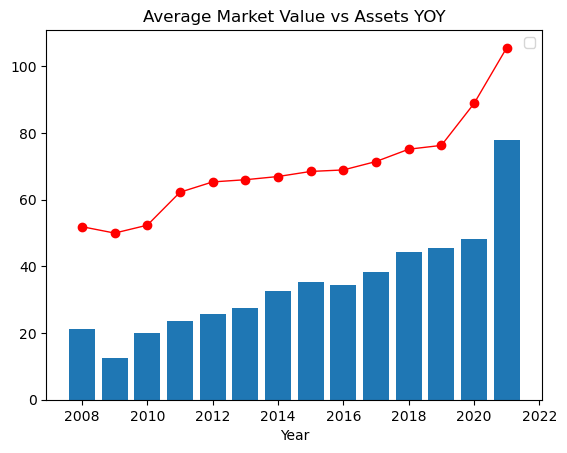

In [32]:
# plot market value vs Assets
plt.bar(mean_val.index, mean_val["Market Value"], linewidth=1)
plt.plot(mean_val.index,mean_val["Assets"], marker="o", color="red", linewidth=1)
plt.title("Average Market Value vs Assets YOY")
plt.xlabel("Year")
plt.legend('Market Value','Sales', loc="best")
plt.show()

In [33]:
# do comparison of 2008 to 2009 and 2020 to 2021

In [34]:
# look for 2008 data
us08 = us.loc[us["Year"] == 2008]
us08

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008
...,...,...,...,...,...,...,...,...,...
1985,RH Donnelley,Media,United States,0.51,0.05,16.09,2.68,1984.0,2008
1988,Fulton Financial,Banking,United States,2.02,0.15,15.92,1.09,1989.0,2008
1990,URS,Construction,United States,3.36,0.13,6.93,5.38,1990.0,2008
1992,Wesco International,Capital Goods,United States,1.76,0.24,2.88,6.00,1993.0,2008


In [35]:


# group by industry and find the mean of each in 2008
groupbyind = us08.groupby(["Industry"])
mean_ind = groupbyind["Profits"].mean()
df08 = pd.DataFrame(mean_ind)

In [36]:
# sort by profit
df08.sort_values(by=['Profits'], ascending=False, inplace=True)
df08

,Profits
Industry,
Conglomerates,3.921000
Oil & Gas Operations,2.854884
Drugs & Biotechnology,2.446111
Software & Services,2.252105
Aerospace & Defense,1.810000
Banking,1.532500
Food Drink & Tobacco,1.498077
Technology Hardware & Equip,1.441250
Household & Personal Products,1.406250


In [37]:
# find the top 5
top5 = df08.head()
top5

,Profits
Industry,
Conglomerates,3.921000
Oil & Gas Operations,2.854884
Drugs & Biotechnology,2.446111
Software & Services,2.252105
Aerospace & Defense,1.810000


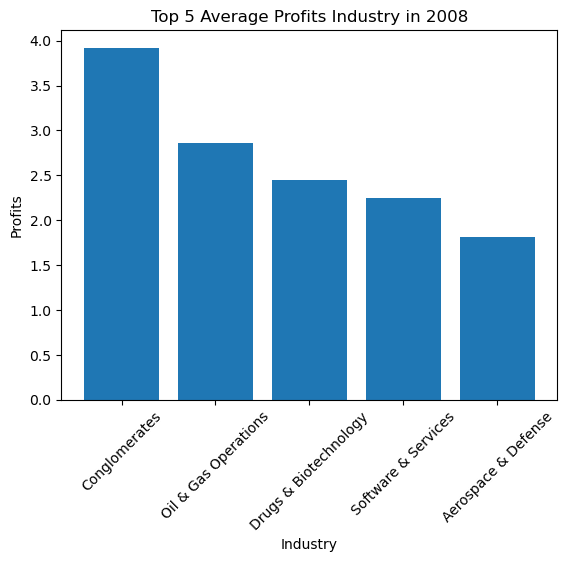

In [38]:
# plot top 5
plt.bar(top5.index, top5["Profits"], linewidth=1)
plt.xticks(rotation=45)
plt.title("Top 5 Average Profits Industry in 2008")
plt.xlabel("Industry")
plt.ylabel("Profits")
plt.show() 

# This chart tells us which industry still remain profitable in 2008

In [39]:
# find the bottom5
bottom5 = df08.tail()
bottom5

,Profits
Industry,
Materials,0.706667
Business Services & Supplies,0.364800
Construction,-0.319231
Telecommunications Services,-0.630833
Consumer Durables,-2.320588


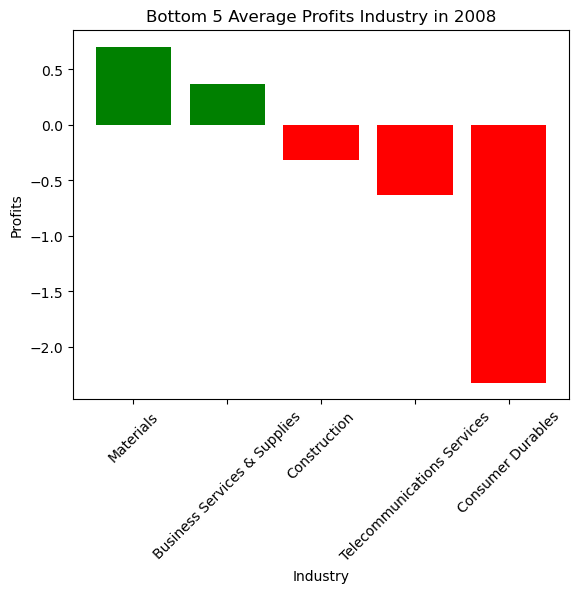

In [40]:
# plot bottom 5
plt.bar(bottom5.index, bottom5["Profits"], linewidth=1, color=(bottom5["Profits"] > 0).map({True:'g' , False: 'r'}))
plt.xticks(rotation=45)
plt.title("Bottom 5 Average Profits Industry in 2008")
plt.xlabel("Industry")
plt.ylabel("Profits")
plt.show() 

# This chart tells us which industry took the biggest loss in 2008

In [41]:
# look for 2020 data
us20 = us.loc[us["Year"] == 2020]
us20

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year
2,JPMorgan Chase,Major Banks,United States,291.70,30.00,3139.4,142.9,3.0,2020
3,Berkshire Hathaway,Investment Services,United States,455.40,81.40,817.7,254.6,4.0,2020
7,Bank of America,Major Banks,United States,208.60,24.10,2620.0,112.1,8.0,2020
8,Apple,Computer Hardware,United States,1285.50,57.20,320.4,267.7,9.0,2020
10,AT&T,Telecommunications services,United States,218.60,14.40,545.4,179.2,11.0,2020
...,...,...,...,...,...,...,...,...,...
1974,BJ's Wholesale Club,Discount Stores,United States,3.60,0.19,5.3,13.2,1975.0,2020
1982,Chesapeake Energy,Oil & Gas Operations,United States,0.17,-0.31,16.2,8.6,1983.0,2020
1989,Cabot Oil & Gas,Oil & Gas Operations,United States,8.60,0.47,4.5,1.7,1990.0,2020
1992,L Brands,Apparel/Footwear Retail,United States,3.30,-0.37,10.1,12.9,1990.0,2020


In [42]:
# group by industry and find the mean of each in 2020
groupbyind20 = us20.groupby(["Industry"])
mean_ind20 = groupbyind20["Profits"].mean()
df20 = pd.DataFrame(mean_ind20)

In [43]:
# sort by profit
df20.sort_values(by=['Profits'], ascending=False, inplace=True)
df20

,Profits
Industry,
Computer Hardware,16.500000
Computer Services,11.081667
Major Banks,10.509000
Investment Services,6.229565
Managed Health Care,4.613333
...,...
Auto & Truck Parts,0.190000
Trading Companies,0.060000
Diversified Media,0.000000


In [44]:
# find the top 5
top5_20 = df20.head()
top5_20

,Profits
Industry,
Computer Hardware,16.500000
Computer Services,11.081667
Major Banks,10.509000
Investment Services,6.229565
Managed Health Care,4.613333


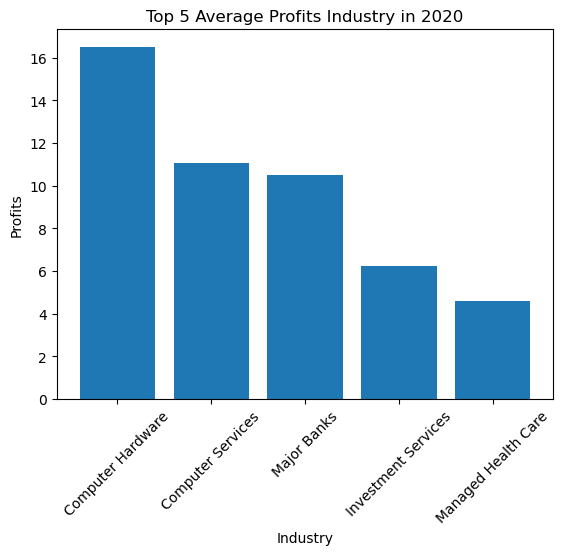

In [45]:
# plot top 5
plt.bar(top5_20.index, top5_20["Profits"], linewidth=1)
plt.xticks(rotation=45)
plt.title("Top 5 Average Profits Industry in 2020")
plt.xlabel("Industry")
plt.ylabel("Profits")
plt.show() 

# This chart tells us which industry still remain profitable in 2020

In [46]:
# find the bottom5 in 2020
bottom5_20 = df20.tail()
bottom5_20

,Profits
Industry,
Auto & Truck Parts,0.19
Trading Companies,0.06
Diversified Media,0.00
Security Systems,-0.17
Oil Services & Equipment,-3.45


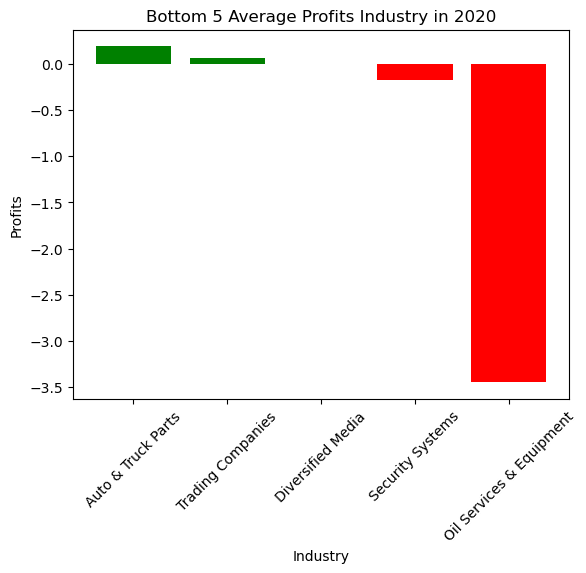

In [47]:
# plot bottom 5 in 2020
plt.bar(bottom5_20.index, bottom5_20["Profits"], linewidth=1, color=(bottom5_20["Profits"] > 0).map({True:'g' , False: 'r'}))
plt.xticks(rotation=45)
plt.title("Bottom 5 Average Profits Industry in 2020")
plt.xlabel("Industry")
plt.ylabel("Profits")
plt.show() 

# This chart tells us which industry took the biggest loss in 2020

In [48]:
# Marc- this is the end for the part you're matching Jiamin

In [49]:
# Identifying unique companies
companies = us["Company"].unique()

In [50]:
# Grouping by years for companies
years = us.groupby("Year")["Company"].unique()

In [51]:
# Identifying the unique industries
industries = us["Industry"].unique()

In [52]:
industries # maybe select a few industries to reduce data for analysis

array(['Conglomerates', 'Banking', 'Oil & Gas Operations',
       'Diversified Financials', 'Telecommunications Services',
       'Retailing', 'Insurance', 'Household & Personal Products',
       'Software & Services', 'Technology Hardware & Equip',
       'Drugs & Biotechnology', 'Media', 'Food Drink & Tobacco',
       'Semiconductors', 'Aerospace & Defense',
       'Health Care Equipment & Svcs', 'Capital Goods', 'Chemicals',
       'Utilities', 'Materials', 'Hotels, Restaurants & Leisure',
       'Transportation', 'Consumer Durables', 'Food Markets',
       'Business Services & Supplies', 'Construction',
       'Food, Drink & Tobacco', 'Major Banks', 'Investment Services',
       'Telecommunications services', 'Discount Stores',
       'Diversified Insurance', 'Computer Services',
       'Household-Personal Care', 'Pharmaceuticals', 'Computer Hardware',
       'Software & Programming', 'Auto & Truck Manufacturers',
       'Medical Equipment & Supplies', 'Beverages',
       'Communic

In [53]:
# Assigning bin labels for profit ranges and cutting into df
profit_bins = [-100, 0, 5, 10, 100] # need to sort out size for profit amounts
labels = ["Profit Loss/No Profit", "Less than $5 bil", "Between $5-10 bil", "Above $10 bil"]
us["Profit Range"] = pd.cut(us['Profits'], profit_bins, labels=labels)
us

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,Above $10 bil
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,Above $10 bil
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
...,...,...,...,...,...,...,...,...,...,...
1892,Fluor,Construction Services,United States,3.20,-0.44,7.30,15.70,1893.0,2021,Profit Loss/No Profit
1897,Toll Brothers,Construction Services,United States,7.50,0.49,10.90,7.30,1898.0,2021,Less than $5 bil
1901,Tenneco,Auto & Truck Parts,United States,0.94,-1.50,11.90,15.40,1902.0,2021,Profit Loss/No Profit
1912,PBF Energy,Oil & Gas Operations,United States,1.70,-1.40,10.50,15.10,1913.0,2021,Profit Loss/No Profit


In [54]:
# Xiaolin will do the same for petroleum

In [55]:
# Grabbing the desired rows with industries in financial sector
financials = us.loc[(us["Industry"] == "Banking") | (us["Industry"] == "Major Banks") | (us["Industry"] == "Regional Banks")
              | (us["Industry"] == "Diversified Financials") | (us["Industry"] == "Investment Services")
              | (us["Industry"] == "Consumer Financial Services") | (us["Industry"] == "Diversified Insurance") 
              | (us["Industry"] == "Insurance Brokers") | (us["Industry"] == "Life & Health Insurance")  
              | (us["Industry"] == "Property & Casualty Insurance") | (us["Industry"] == "Insurance Brokers") 
              | (us["Industry"] == "Real Estate") | (us["Industry"] == "Rental & Leasing") 
              | (us["Industry"] == "Thrifts & Mortgage Finance") | (us["Industry"] == "Rental & Leasing") 
]

financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
22,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,Above $10 bil
23,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
1615,Extra Space Storage,Real Estate,United States,19.10,0.47,9.40,1.30,1616.0,2021,Less than $5 bil
1702,Interactive Brokers Group,Investment Services,United States,7.00,0.20,95.70,2.50,1703.0,2021,Less than $5 bil
1860,Cullen/Frost Bankers,Regional Banks,United States,7.30,0.33,42.40,1.50,1861.0,2021,Less than $5 bil
1888,CIT Group,Consumer Financial Services,United States,5.20,-0.62,58.10,3.10,1889.0,2021,Profit Loss/No Profit


In [56]:
# Resetting index
financials.reset_index(inplace=True, drop=True)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,Above $10 bil
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
1559,Extra Space Storage,Real Estate,United States,19.10,0.47,9.40,1.30,1616.0,2021,Less than $5 bil
1560,Interactive Brokers Group,Investment Services,United States,7.00,0.20,95.70,2.50,1703.0,2021,Less than $5 bil
1561,Cullen/Frost Bankers,Regional Banks,United States,7.30,0.33,42.40,1.50,1861.0,2021,Less than $5 bil
1562,CIT Group,Consumer Financial Services,United States,5.20,-0.62,58.10,3.10,1889.0,2021,Profit Loss/No Profit


In [57]:
# checking info 
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company       1564 non-null   object  
 1   Industry      1564 non-null   object  
 2   Country       1564 non-null   object  
 3   Market Value  1564 non-null   float64 
 4   Profits       1564 non-null   float64 
 5   Assets        1564 non-null   float64 
 6   Sales         1564 non-null   float64 
 7   Rank          1564 non-null   float64 
 8   Year          1564 non-null   int64   
 9   Profit Range  1564 non-null   category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 111.8+ KB


In [58]:
# Finding the profit max from all years
financials_highest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmax()]
financials_highest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
1,JPMorgan Chase,Banking,United States,136.880,15.370,1562.150,116.350,4.0,2008,Above $10 bil
101,Berkshire Hathaway,Diversified Financials,United States,122.110,4.990,267.400,107.790,19.0,2009,Less than $5 bil
186,Goldman Sachs Group,Diversified Financials,United States,84.950,13.390,849.000,51.670,25.0,2010,Above $10 bil
261,JPMorgan Chase,Major Banks,United States,182.200,17.400,2117.600,115.500,1.0,2011,Above $10 bil
379,JPMorgan Chase,Major Banks,United States,170.100,19.000,2265.800,110.800,2.0,2012,Above $10 bil
489,JPMorgan Chase,Major Banks,United States,191.400,21.300,2359.100,108.200,3.0,2013,Above $10 bil
625,Fannie Mae,Investment Services,United States,4.600,84.000,3270.100,122.900,355.0,2014,Above $10 bil
714,Wells Fargo,Major Banks,United States,278.273,23.057,1701.408,90.403,10.0,2015,Above $10 bil
832,Berkshire Hathaway,Investment Services,United States,360.145,24.083,561.068,210.821,4.0,2016,Above $10 bil
958,JPMorgan Chase,Major Banks,United States,306.616,24.231,2512.986,102.494,4.0,2017,Above $10 bil


In [59]:
# Finding the profit min from all years
financials_lowest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmin()]
financials_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
20,Merrill Lynch,Diversified Financials,United States,48.020,-7.7800,1020.050,62.680,431.0,2008,Profit Loss/No Profit
125,Fannie Mae,Diversified Financials,United States,0.460,-58.3000,912.400,43.120,824.0,2009,Profit Loss/No Profit
217,Fannie Mae,Diversified Financials,United States,1.100,-71.9700,869.140,29.070,849.0,2010,Profit Loss/No Profit
307,Fannie Mae,Investment Services,United States,0.464,-14.0000,3222.000,154.300,790.0,2011,Profit Loss/No Profit
422,Fannie Mae,Investment Services,United States,1.800,-16.9000,3211.500,137.700,795.0,2012,Profit Loss/No Profit
565,CIT Group,Consumer Financial Services,United States,9.000,-0.6000,44.000,4.000,1265.0,2013,Profit Loss/No Profit
630,Prudential Financial,Life & Health Insurance,United States,39.700,-0.7000,731.800,48.700,433.0,2014,Profit Loss/No Profit
787,Genworth Financial,Diversified Insurance,United States,3.852,-1.2440,111.358,9.629,1119.0,2015,Profit Loss/No Profit
911,Genworth Financial,Diversified Insurance,United States,1.490,-0.6150,106.431,8.833,1142.0,2016,Profit Loss/No Profit
1046,CIT Group,Consumer Financial Services,United States,8.799,-0.8609,64.170,4.351,1272.0,2017,Profit Loss/No Profit


In [60]:
# Creating a list of years
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

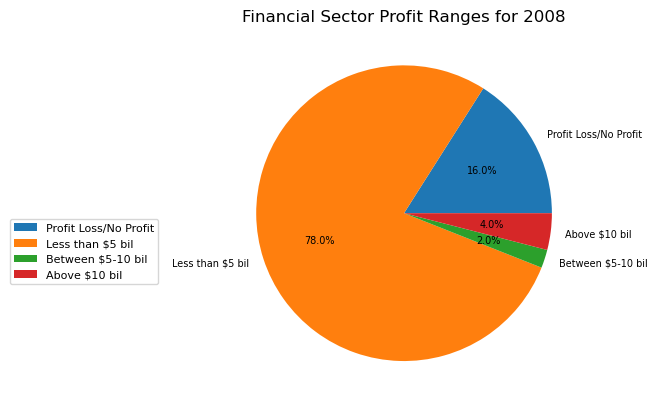

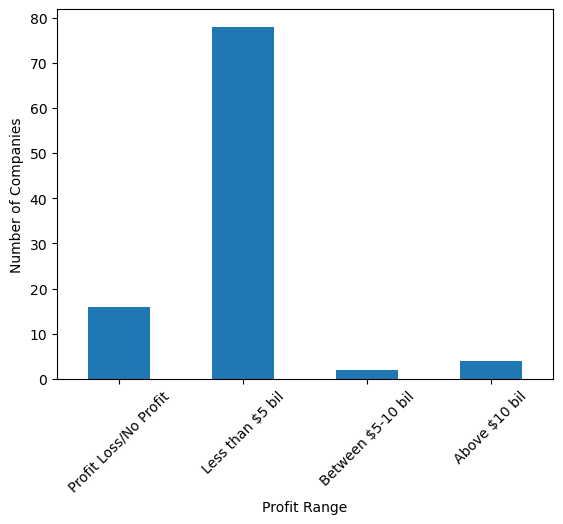

Profit Range
Profit Loss/No Profit    16
Less than $5 bil         78
Between $5-10 bil         2
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     1.117600
median   0.375000
var      9.612352
std      3.100379
sem      0.310038
min     -7.780000
max     15.370000


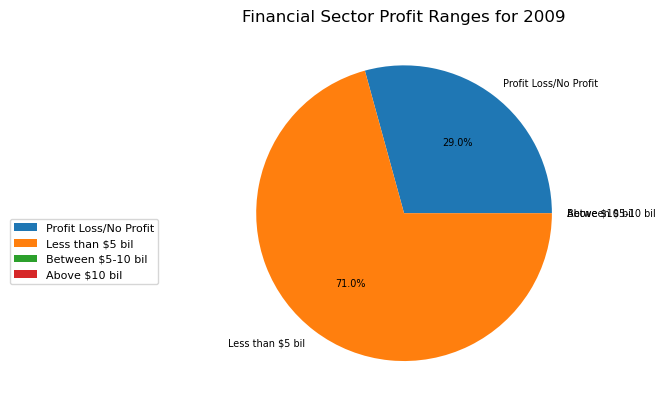

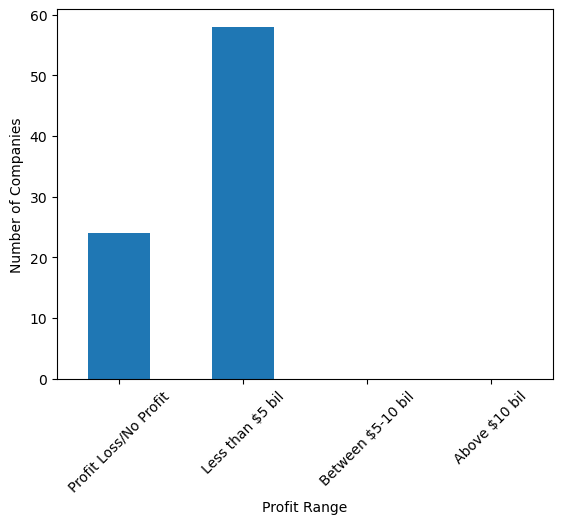

Profit Range
Profit Loss/No Profit    24
Less than $5 bil         58
Between $5-10 bil         0
Above $10 bil             0
Name: Profit Range, dtype: int64
          Profits
mean    -1.333293
median   0.245000
var     82.767882
std      9.097686
sem      1.004671
min    -58.300000
max      4.990000


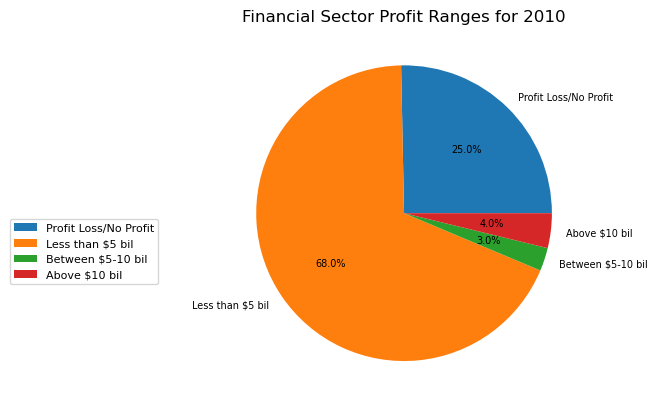

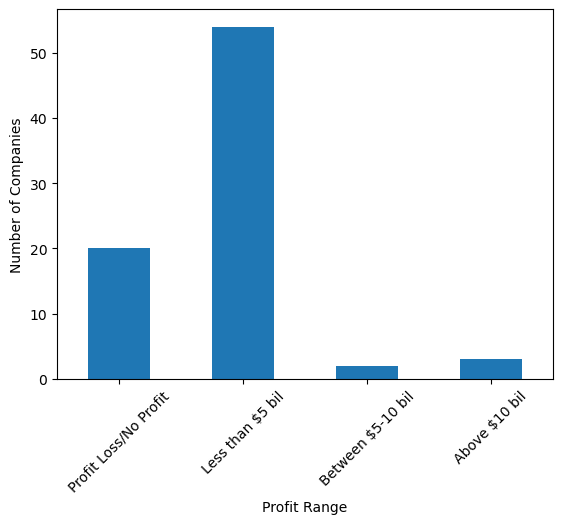

Profit Range
Profit Loss/No Profit    20
Less than $5 bil         54
Between $5-10 bil         2
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean    -0.307848
median   0.270000
var     80.499479
std      8.972150
sem      1.009446
min    -71.970000
max     13.390000


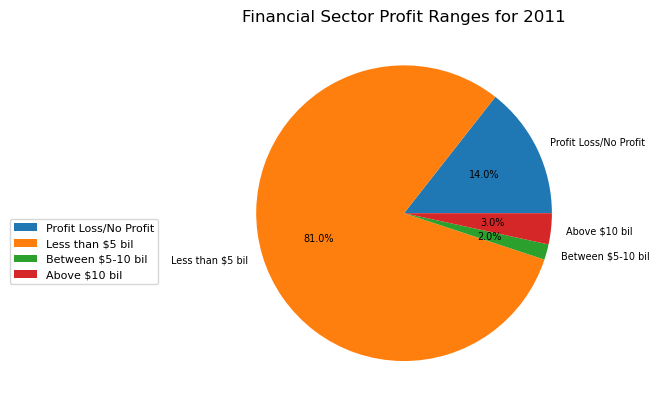

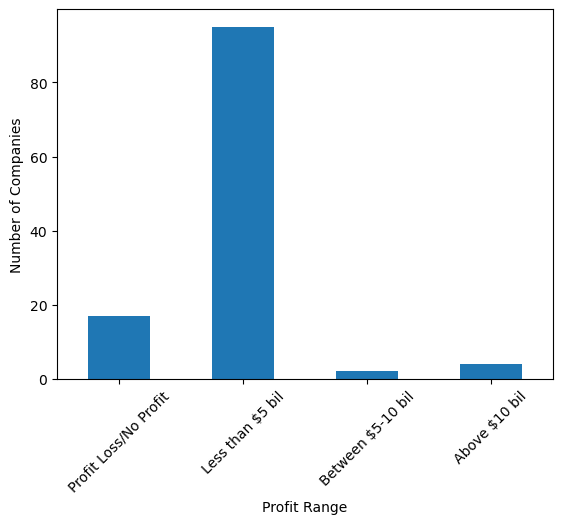

Profit Range
Profit Loss/No Profit    17
Less than $5 bil         95
Between $5-10 bil         2
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     0.986236
median   0.425750
var     11.298581
std      3.361336
sem      0.309436
min    -14.000000
max     17.400000


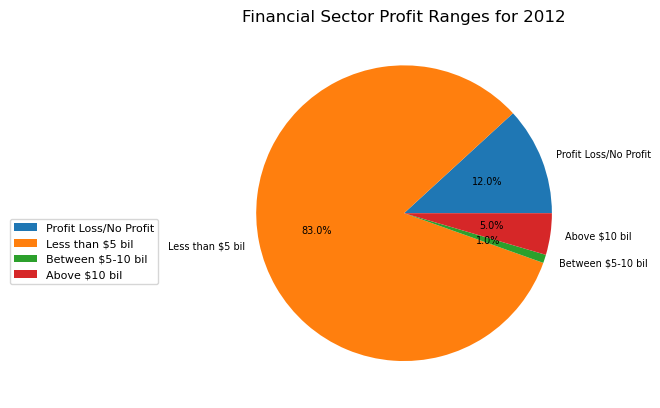

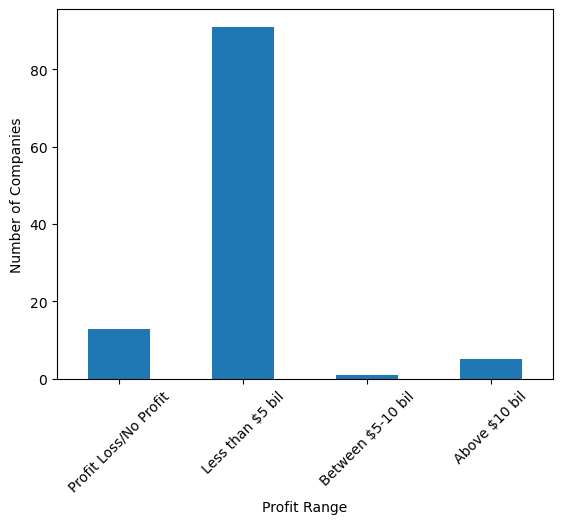

Profit Range
Profit Loss/No Profit    13
Less than $5 bil         91
Between $5-10 bil         1
Above $10 bil             5
Name: Profit Range, dtype: int64
          Profits
mean     1.320909
median   0.500000
var     14.071577
std      3.751210
sem      0.357664
min    -16.900000
max     19.000000


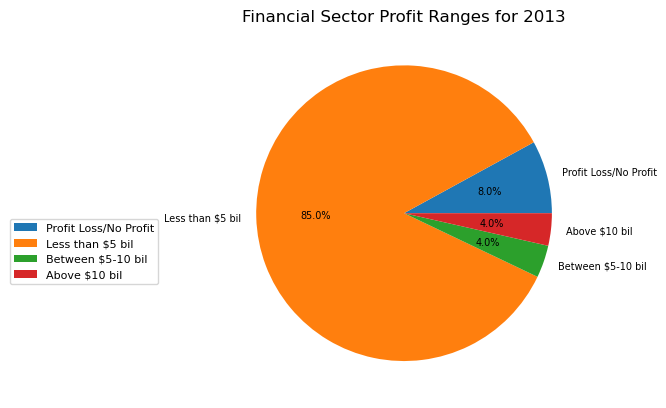

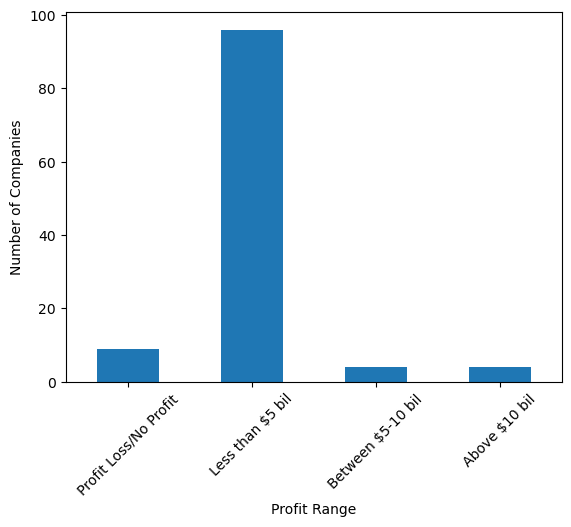

Profit Range
Profit Loss/No Profit     9
Less than $5 bil         96
Between $5-10 bil         4
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     1.641593
median   0.600000
var     10.891022
std      3.300155
sem      0.310452
min     -0.600000
max     21.300000


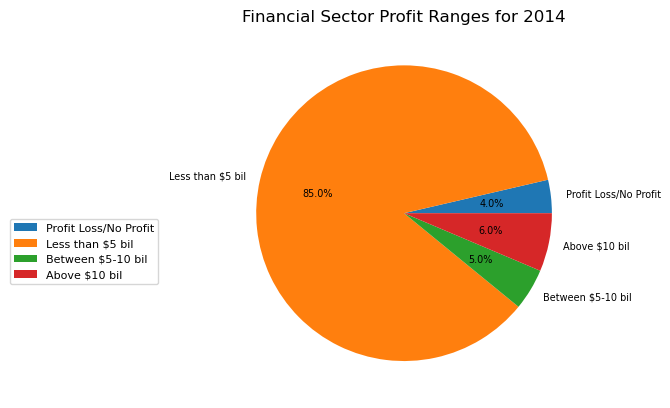

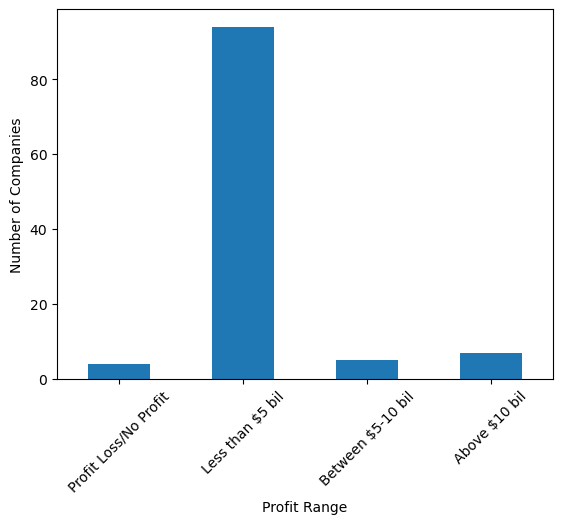

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         94
Between $5-10 bil         5
Above $10 bil             7
Name: Profit Range, dtype: int64
          Profits
mean     3.126364
median   0.600000
var     94.048565
std      9.697864
sem      0.924655
min     -0.700000
max     84.000000


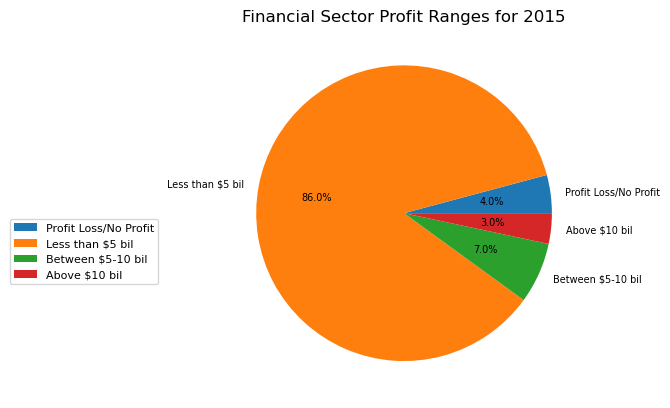

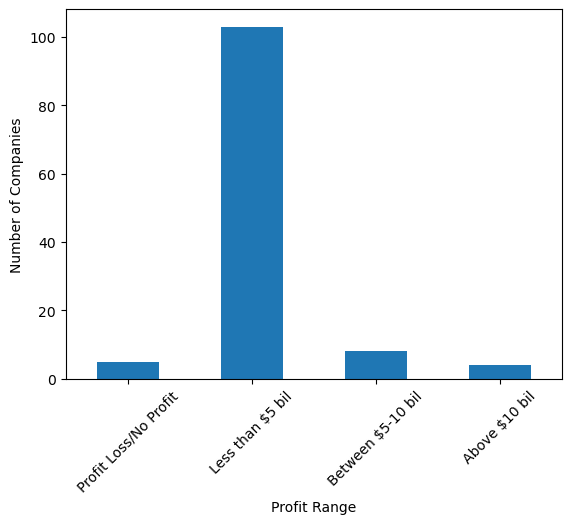

Profit Range
Profit Loss/No Profit      5
Less than $5 bil         103
Between $5-10 bil          8
Above $10 bil              4
Name: Profit Range, dtype: int64
          Profits
mean     1.966472
median   0.657350
var     14.407036
std      3.795660
sem      0.346495
min     -1.244000
max     23.057000


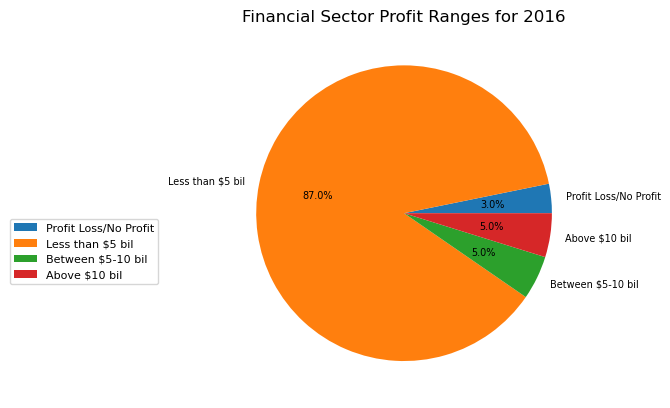

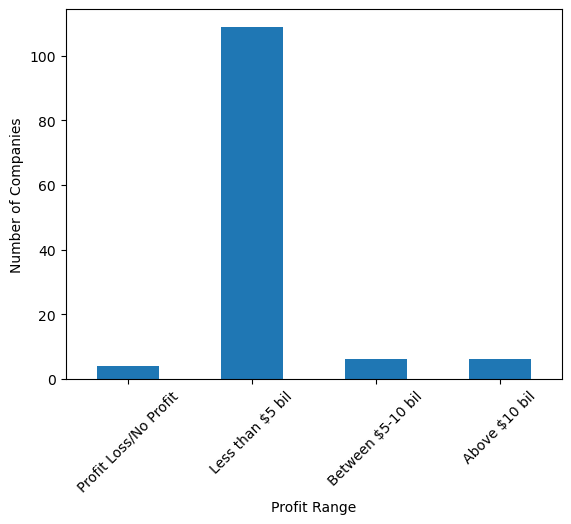

Profit Range
Profit Loss/No Profit      4
Less than $5 bil         109
Between $5-10 bil          6
Above $10 bil              6
Name: Profit Range, dtype: int64
          Profits
mean     2.044406
median   0.614900
var     17.499091
std      4.183192
sem      0.374156
min     -0.615000
max     24.083000


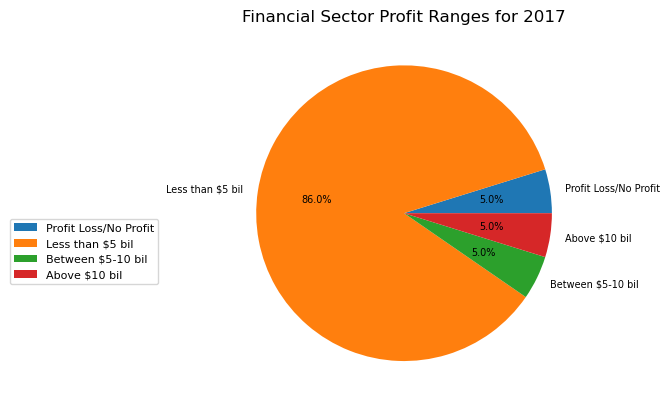

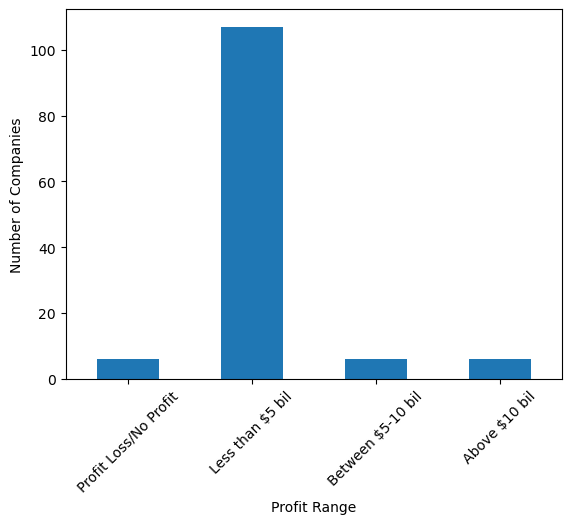

Profit Range
Profit Loss/No Profit      6
Less than $5 bil         107
Between $5-10 bil          6
Above $10 bil              6
Name: Profit Range, dtype: int64
          Profits
mean     2.045546
median   0.682000
var     17.857976
std      4.225870
sem      0.377973
min     -0.860900
max     24.231000


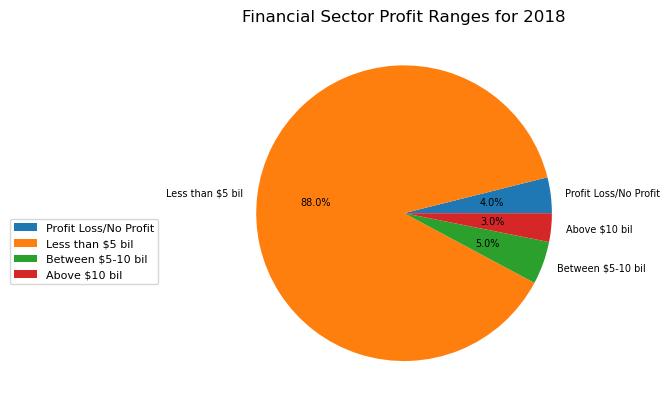

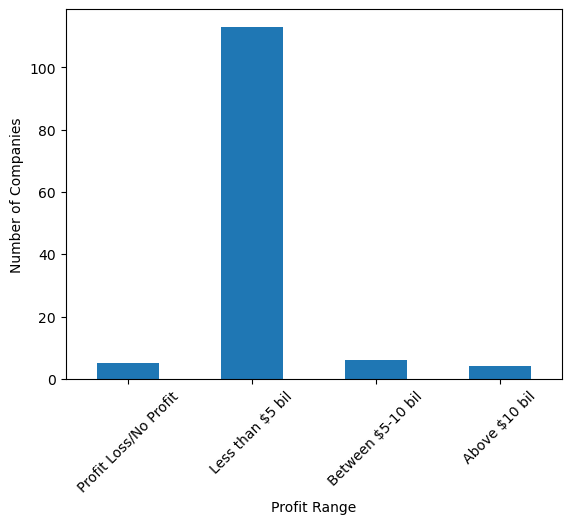

Profit Range
Profit Loss/No Profit      5
Less than $5 bil         113
Between $5-10 bil          6
Above $10 bil              4
Name: Profit Range, dtype: int64
          Profits
mean     2.110394
median   0.780250
var     25.499496
std      5.049703
sem      0.446335
min     -6.331000
max     39.742000


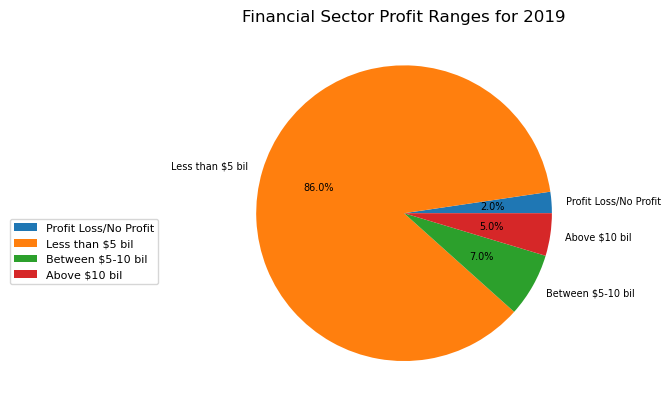

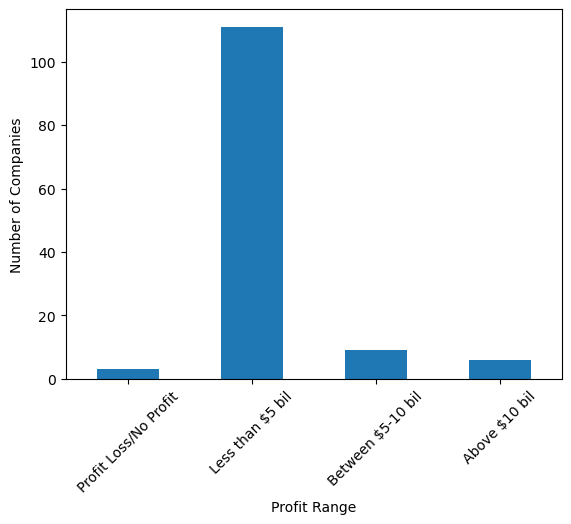

Profit Range
Profit Loss/No Profit      3
Less than $5 bil         111
Between $5-10 bil          9
Above $10 bil              6
Name: Profit Range, dtype: int64
          Profits
mean     2.439891
median   0.858000
var     23.860183
std      4.884689
sem      0.430073
min     -0.225000
max     32.738000


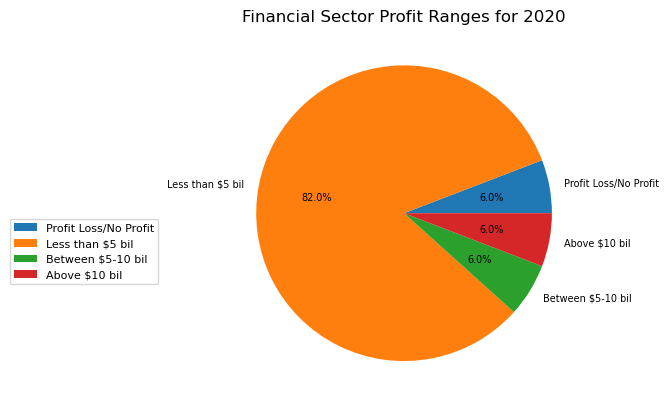

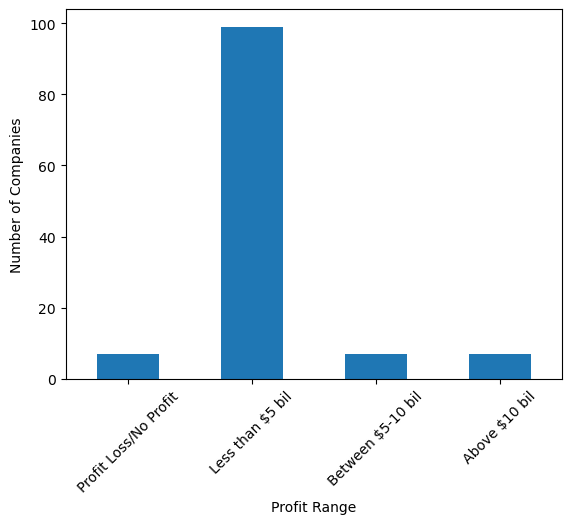

Profit Range
Profit Loss/No Profit     7
Less than $5 bil         99
Between $5-10 bil         7
Above $10 bil             7
Name: Profit Range, dtype: int64
          Profits
mean     2.998917
median   0.920000
var     71.637843
std      8.463914
sem      0.772646
min     -5.000000
max     81.400000


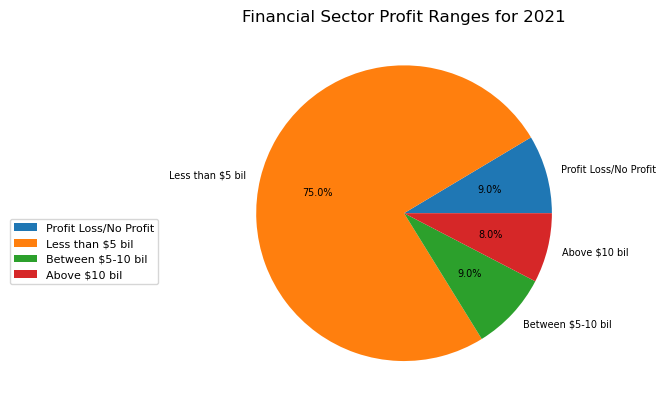

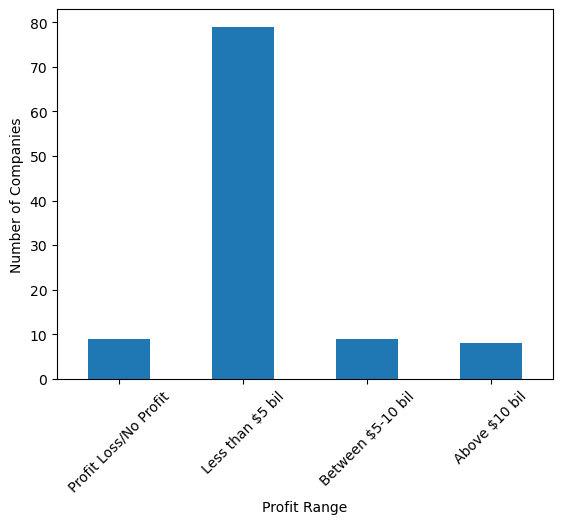

Profit Range
Profit Loss/No Profit     9
Less than $5 bil         79
Between $5-10 bil         9
Above $10 bil             8
Name: Profit Range, dtype: int64
          Profits
mean     2.872286
median   0.860000
var     42.516037
std      6.520432
sem      0.636329
min     -5.900000
max     42.500000


In [61]:
# Using for loop to plot the profit ranges in pie and bar for all years
for year in years:
    profit_year = financials[financials['Year'] == year]
    ranges = profit_year.groupby('Profit Range')['Profit Range'].count()
    plt.pie(ranges.values,labels=ranges.index.values,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',radius=1,textprops={'fontsize': 7})
    plt.title(f"Financial Sector Profit Ranges for {year}", pad=5)
    plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
    plt.savefig(f"Output/financials{year}_pr_pie.png",  bbox_inches='tight')
    plt.show()
    ranges.plot.bar()
    plt.xticks(rotation=45, ha='center')
    plt.ylabel('Number of Companies')
    plt.xlabel('Profit Range')
    plt.savefig(f"Output/financials{year}_pr_bar.png",  bbox_inches='tight')
    plt.show()    
    info = profit_year.aggregate({'Profits':["mean",
                                "median", "var", "std", "sem", "min", "max"]})    
    print(ranges)
    print(info)


The above pie plots show that during the 2008 Housing Crisis, there weren't any companies in the financial sector that made over 5 billion and the percentage of companies that experienced no profit or a profit loss doubled in 2009.  While in 2020, during the Covid19 Pandemic, it shows a decrease in companies with less than $5 billion in profit and an increase for companies that made more than 5 billion.  It appears that the 2008 Housing Crisis had a negative impact on the financial sector, while the Covid19 Pandemic had a positive impact.

In [62]:
# Creating empty lists for line plot of profit ranges
loss = []
less = []
between = []
above = []

# Using for loop to grab the data to append the lists
for year in years:
    profits = financials[financials['Year'] == year]
    range = profits.groupby('Profit Range')['Profit Range'].count()
    loss.append(range.iloc[0])
    less.append(range.iloc[1])
    between.append(range.iloc[2])
    above.append(range.iloc[3])

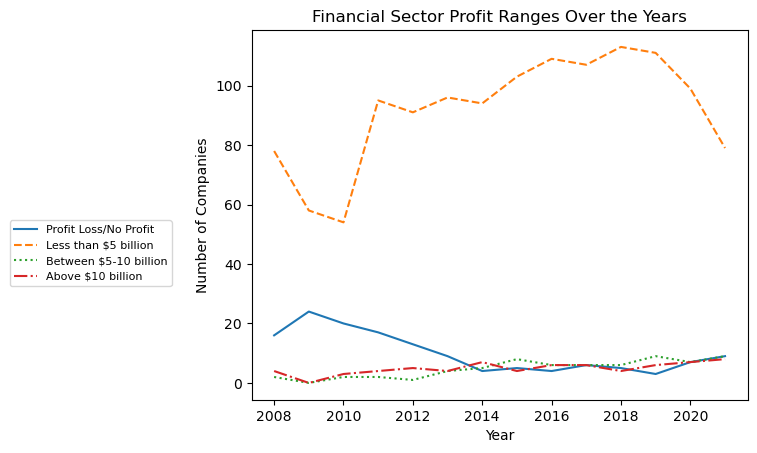

In [63]:
# Multiline plot for profit ranges 
plt.plot(years, loss, label = 'Profit Loss/No Profit', linestyle = '-')
plt.plot(years, less, label = 'Less than $5 billion', linestyle = '--')
plt.plot(years, between, label = 'Between $5-10 billion', linestyle = 'dotted')
plt.plot(years, above, label = 'Above $10 billion', linestyle = 'dashdot')
plt.xticks()
plt.ylabel('Number of Companies')
plt.xlabel('Year')
plt.title('Financial Sector Profit Ranges Over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
plt.savefig(f"Output/financials_pr_yoy.png",  bbox_inches='tight')
plt.show()

In the multiline plot for the financial sector, it shows that there was a decrease overall in companies that made profit and a significant increase in companies that loss profit during the 2008 Housing crisis.  During the Covid19 Pandemic, it shows most companies experienced a profit.

In [64]:
# Grabbing the desired rows with industries in technology sector
tech = us.loc[(us["Industry"] == 'Software & Services') | (us["Industry"] == 'Technology Hardware & Equip') 
              | (us["Industry"] == 'Computer Services') | (us["Industry"] == 'Computer Hardware') 
              | (us["Industry"] == 'Computer Storage Devices') | (us["Industry"] == 'Computer & Electronics Retail') 
              | (us["Industry"] == 'Electronics') | (us["Industry"] == 'Consumer Electronics') 
              | (us["Industry"] == 'Telecommunications Services') | (us["Industry"] == 'Semiconductors') 
              | (us["Industry"] == 'Communications Equipment')]
tech

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
11,AT&T,Telecommunications Services,United States,210.22,11.95,275.64,118.93,12.0,2008,Above $10 bil
36,IBM,Software & Services,United States,157.62,10.42,120.43,98.79,37.0,2008,Above $10 bil
47,Verizon Communications,Telecommunications Services,United States,104.27,5.65,186.96,93.47,48.0,2008,Between $5-10 bil
52,Hewlett-Packard,Technology Hardware & Equip,United States,122.04,7.85,88.57,107.67,53.0,2008,Between $5-10 bil
62,Microsoft,Software & Services,United States,253.15,16.96,67.34,57.90,63.0,2008,Above $10 bil
...,...,...,...,...,...,...,...,...,...,...
1349,Arista Networks,Communications Equipment,United States,24.20,0.63,4.70,2.30,1349.0,2021,Less than $5 bil
1382,NetApp,Computer Storage Devices,United States,17.30,0.59,8.70,5.60,1382.0,2021,Less than $5 bil
1422,Zebra Technologies,Electronics,United States,27.50,0.50,5.40,4.50,1423.0,2021,Less than $5 bil
1840,Avnet,Electronics,United States,4.40,-0.08,8.30,17.90,1841.0,2021,Profit Loss/No Profit


In [65]:
# Resetting index
tech.reset_index(inplace=True, drop=True)
tech

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,AT&T,Telecommunications Services,United States,210.22,11.95,275.64,118.93,12.0,2008,Above $10 bil
1,IBM,Software & Services,United States,157.62,10.42,120.43,98.79,37.0,2008,Above $10 bil
2,Verizon Communications,Telecommunications Services,United States,104.27,5.65,186.96,93.47,48.0,2008,Between $5-10 bil
3,Hewlett-Packard,Technology Hardware & Equip,United States,122.04,7.85,88.57,107.67,53.0,2008,Between $5-10 bil
4,Microsoft,Software & Services,United States,253.15,16.96,67.34,57.90,63.0,2008,Above $10 bil
...,...,...,...,...,...,...,...,...,...,...
664,Arista Networks,Communications Equipment,United States,24.20,0.63,4.70,2.30,1349.0,2021,Less than $5 bil
665,NetApp,Computer Storage Devices,United States,17.30,0.59,8.70,5.60,1382.0,2021,Less than $5 bil
666,Zebra Technologies,Electronics,United States,27.50,0.50,5.40,4.50,1423.0,2021,Less than $5 bil
667,Avnet,Electronics,United States,4.40,-0.08,8.30,17.90,1841.0,2021,Profit Loss/No Profit


In [66]:
# Finding the profit max from all years 
tech_highest_profits = tech.loc[tech.groupby("Year")["Profits"].idxmax()]
tech_highest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
4,Microsoft,Software & Services,United States,253.150,16.960,67.340,57.900,63.0,2008,Above $10 bil
74,Microsoft,Software & Services,United States,143.580,17.230,65.790,61.980,49.0,2009,Above $10 bil
137,Microsoft,Software & Services,United States,254.520,16.260,82.100,58.690,49.0,2010,Above $10 bil
198,Apple,Computer Hardware,United States,324.300,16.600,86.700,76.300,47.0,2011,Above $10 bil
246,Apple,Computer Hardware,United States,546.000,33.000,138.700,127.800,22.0,2012,Above $10 bil
291,Apple,Computer Hardware,United States,416.600,41.700,196.100,164.700,15.0,2013,Above $10 bil
332,Apple,Computer Hardware,United States,483.100,37.000,225.200,173.800,15.0,2014,Above $10 bil
377,Apple,Computer Hardware,United States,741.782,44.462,261.894,199.378,12.0,2015,Above $10 bil
421,Apple,Computer Hardware,United States,585.951,53.731,293.284,233.273,8.0,2016,Above $10 bil
472,Apple,Computer Hardware,United States,752.039,45.217,331.141,217.481,9.0,2017,Above $10 bil


In [67]:
# Finding the profit min from all years 
tech_lowest_profits = tech.loc[tech.groupby("Year")["Profits"].idxmin()]
tech_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
17,Sprint Nextel,Telecommunications Services,United States,20.220,-29.5800,64.110,40.150,578.0,2008,Profit Loss/No Profit
95,Symantec,Software & Services,United States,11.350,-6.2900,10.840,6.220,1011.0,2009,Profit Loss/No Profit
151,Sprint Nextel,Telecommunications Services,United States,10.120,-2.4400,55.420,32.260,595.0,2010,Profit Loss/No Profit
233,Motorola Mobility,Communications Equipment,United States,7.500,-0.0860,6.200,11.500,1421.0,2011,Profit Loss/No Profit
275,Computer Sciences,Computer Services,United States,4.900,-3.9000,11.100,16.000,1349.0,2012,Profit Loss/No Profit
300,Hewlett-Packard,Computer Hardware,United States,43.100,-12.9000,106.700,118.700,438.0,2013,Profit Loss/No Profit
370,LinkedIn,Computer Services,United States,22.700,0.0000,3.400,1.500,1700.0,2014,Profit Loss/No Profit
413,LinkedIn,Computer Services,United States,31.193,-0.0157,5.427,2.219,1620.0,2015,Profit Loss/No Profit
439,Yahoo,Computer Services,United States,35.487,-4.4795,44.156,4.832,925.0,2016,Profit Loss/No Profit
487,Dell Technologies,Computer Hardware,United States,13.475,-3.6910,118.206,61.948,608.0,2017,Profit Loss/No Profit


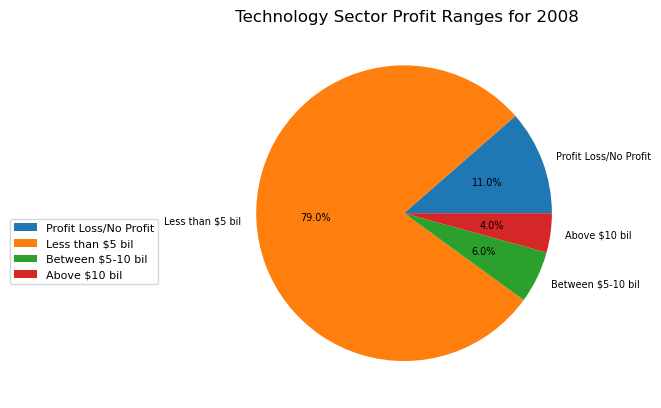

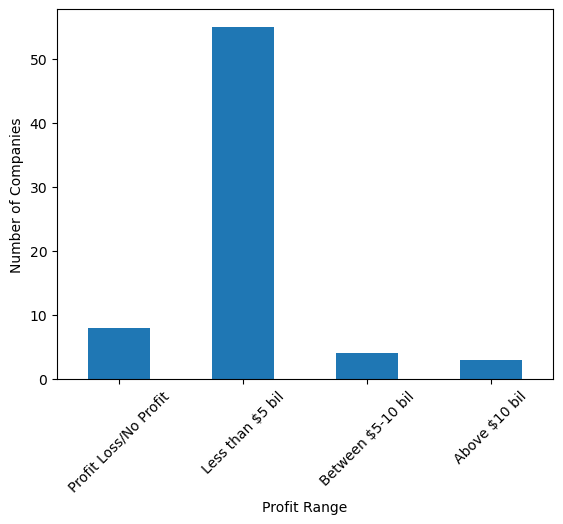

Profit Range
Profit Loss/No Profit     8
Less than $5 bil         55
Between $5-10 bil         4
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     1.173714
median   0.455000
var     23.970108
std      4.895928
sem      0.585175
min    -29.580000
max     16.960000


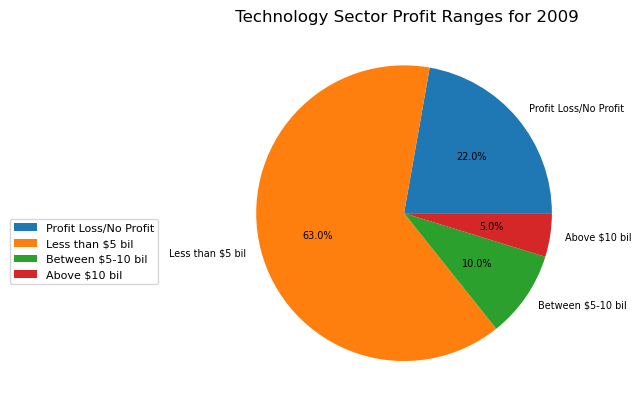

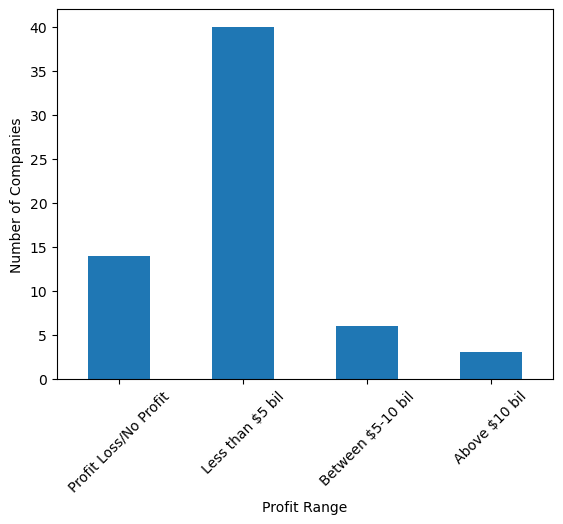

Profit Range
Profit Loss/No Profit    14
Less than $5 bil         40
Between $5-10 bil         6
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     1.415873
median   0.410000
var     14.403344
std      3.795174
sem      0.478147
min     -6.290000
max     17.230000


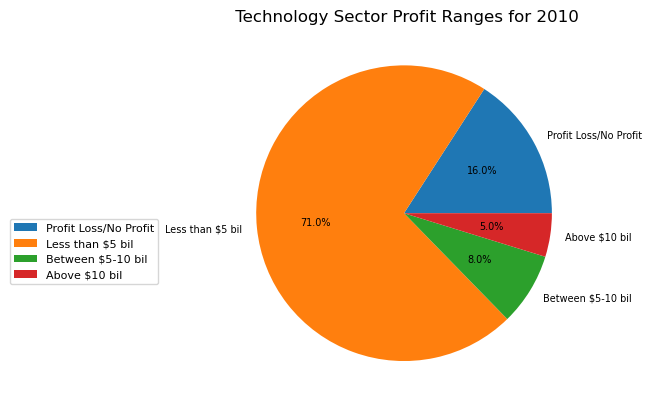

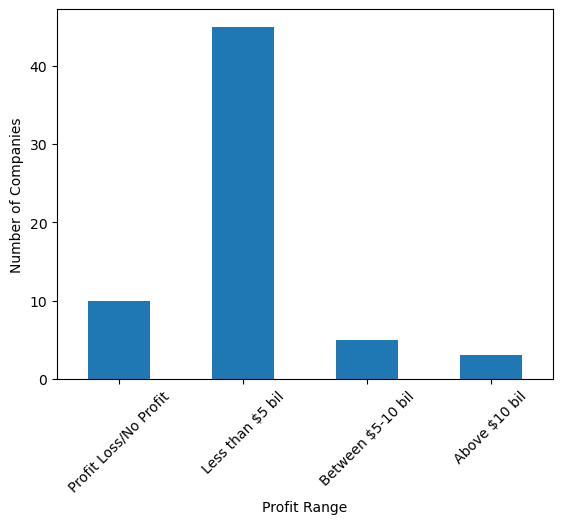

Profit Range
Profit Loss/No Profit    10
Less than $5 bil         45
Between $5-10 bil         5
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     1.628571
median   0.330000
var     12.292087
std      3.506007
sem      0.441715
min     -2.440000
max     16.260000


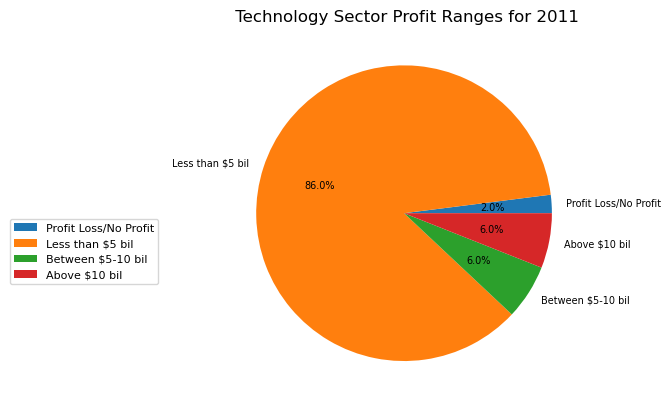

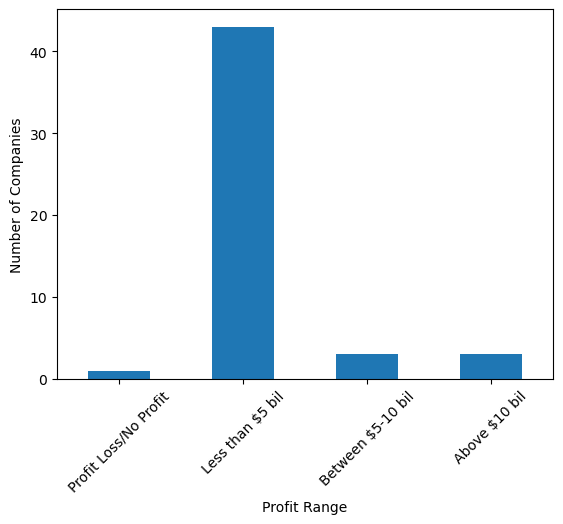

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         43
Between $5-10 bil         3
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     2.148310
median   0.648400
var     13.811406
std      3.716370
sem      0.525574
min     -0.086000
max     16.600000


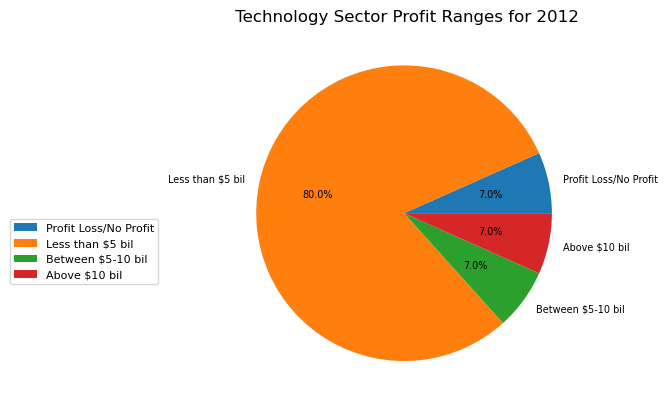

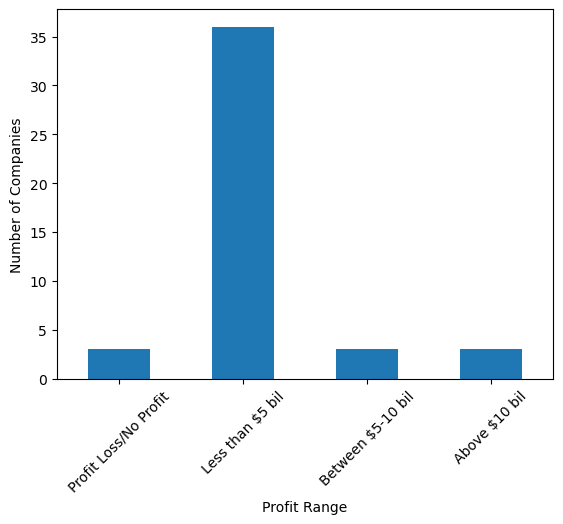

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         36
Between $5-10 bil         3
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     2.580000
median   0.700000
var     33.400727
std      5.779336
sem      0.861533
min     -3.900000
max     33.000000


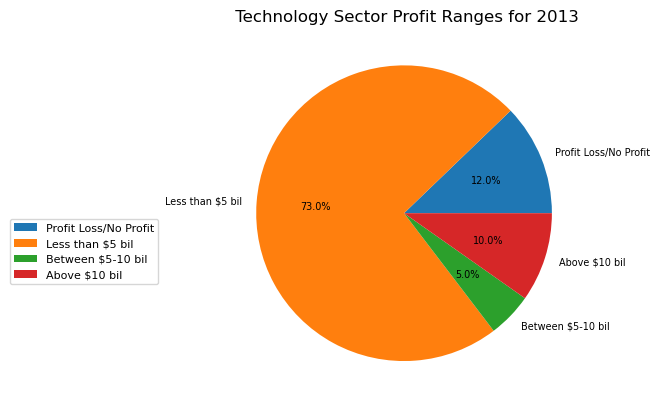

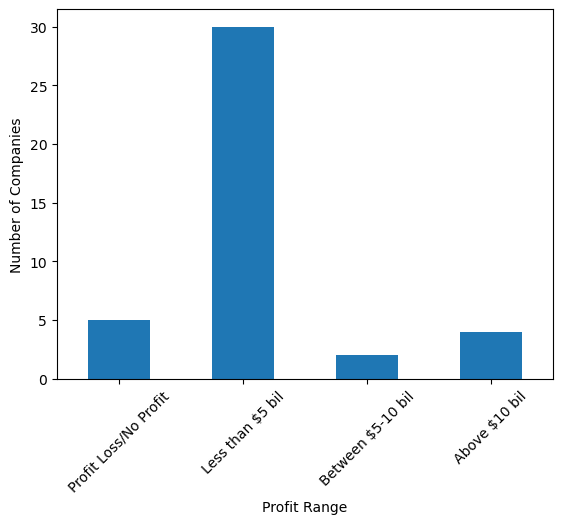

Profit Range
Profit Loss/No Profit     5
Less than $5 bil         30
Between $5-10 bil         2
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     2.670732
median   0.600000
var     57.572122
std      7.587630
sem      1.184989
min    -12.900000
max     41.700000


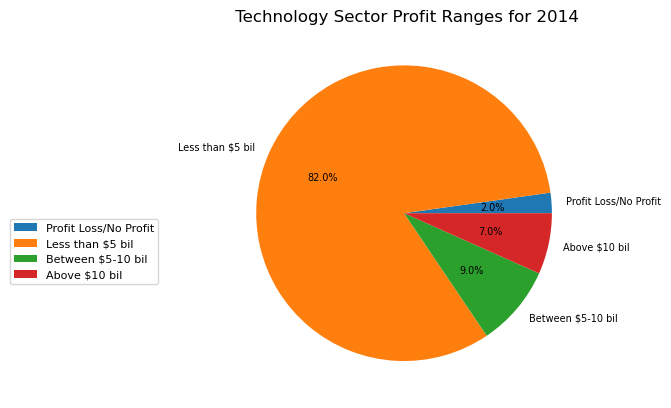

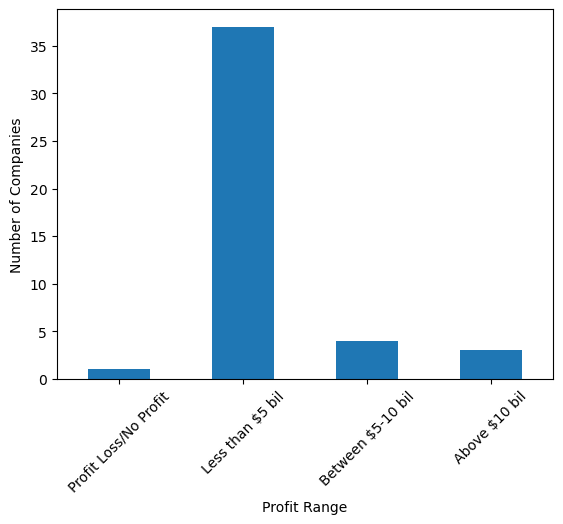

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         37
Between $5-10 bil         4
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     2.786667
median   0.600000
var     38.934364
std      6.239741
sem      0.930166
min      0.000000
max     37.000000


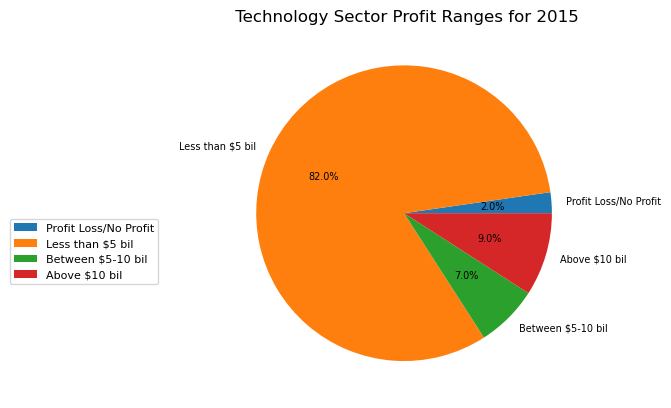

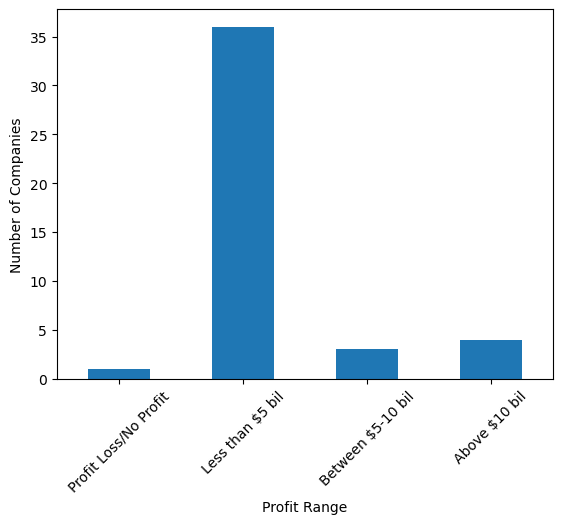

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         36
Between $5-10 bil         3
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     3.284405
median   0.662550
var     52.401757
std      7.238906
sem      1.091306
min     -0.015700
max     44.462000


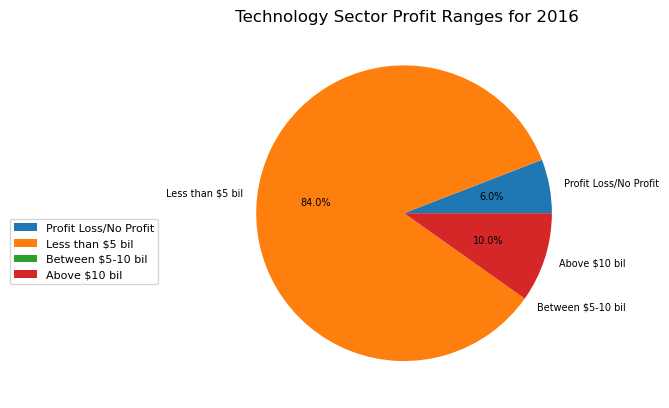

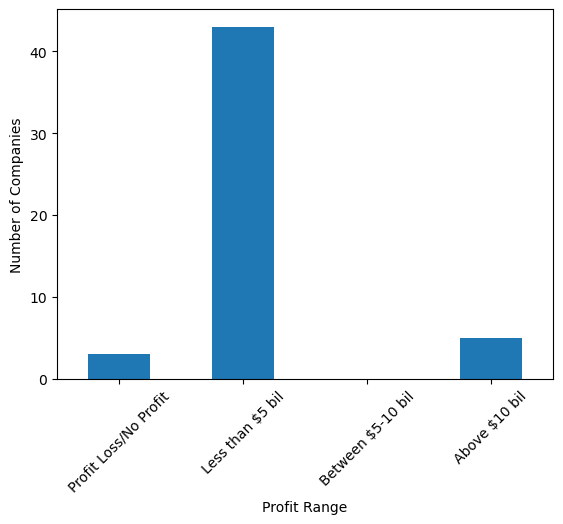

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         43
Between $5-10 bil         0
Above $10 bil             5
Name: Profit Range, dtype: int64
          Profits
mean     2.805996
median   0.566500
var     65.796013
std      8.111474
sem      1.135834
min     -4.479500
max     53.731000


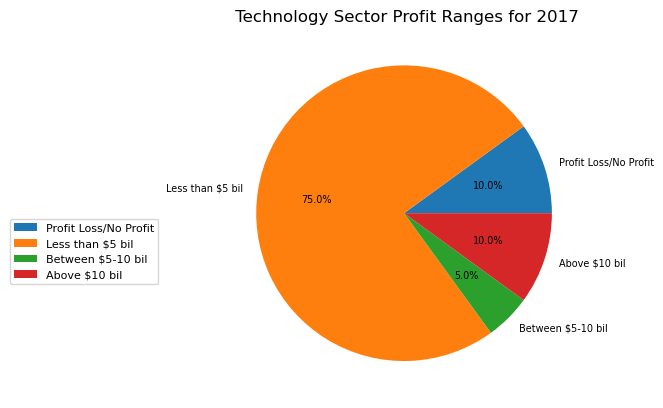

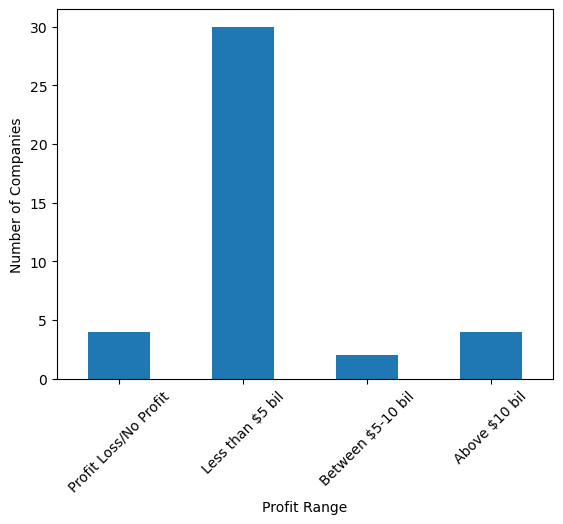

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         30
Between $5-10 bil         2
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     3.410947
median   0.755900
var     63.861403
std      7.991333
sem      1.263541
min     -3.691000
max     45.217000


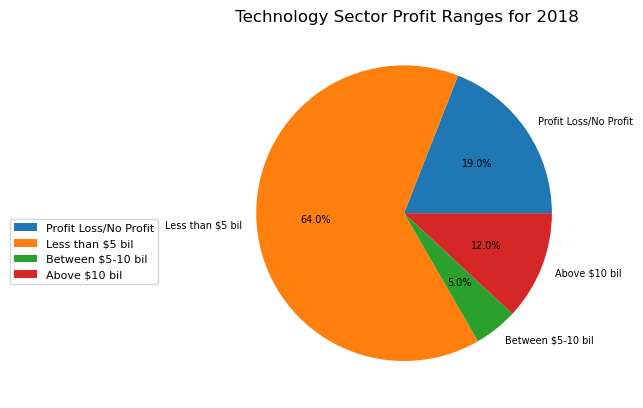

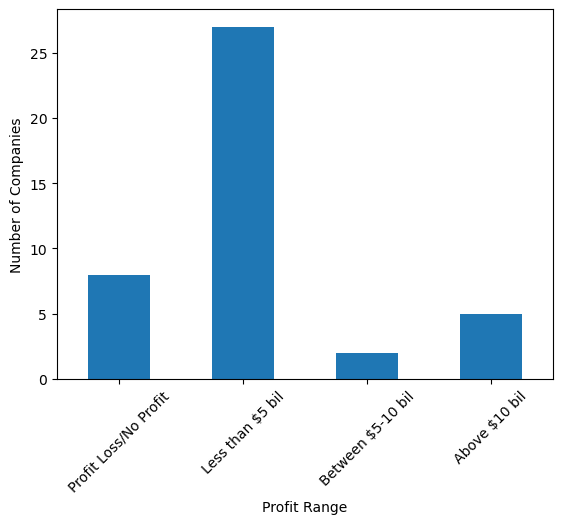

Profit Range
Profit Loss/No Profit     8
Less than $5 bil         27
Between $5-10 bil         2
Above $10 bil             5
Name: Profit Range, dtype: int64
          Profits
mean     3.324948
median   0.575700
var     82.814251
std      9.100234
sem      1.404197
min     -4.556000
max     53.318000


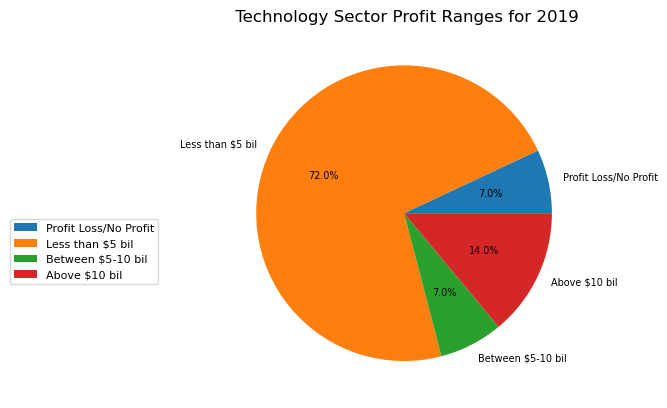

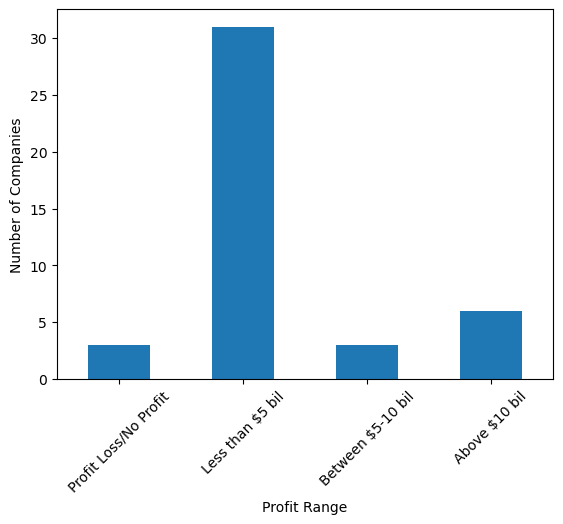

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         31
Between $5-10 bil         3
Above $10 bil             6
Name: Profit Range, dtype: int64
           Profits
mean      5.010465
median    1.066000
var     116.772896
std      10.806151
sem       1.647923
min      -2.310000
max      59.431000


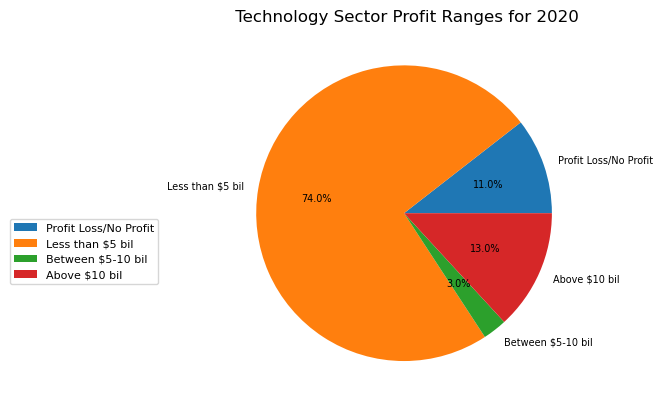

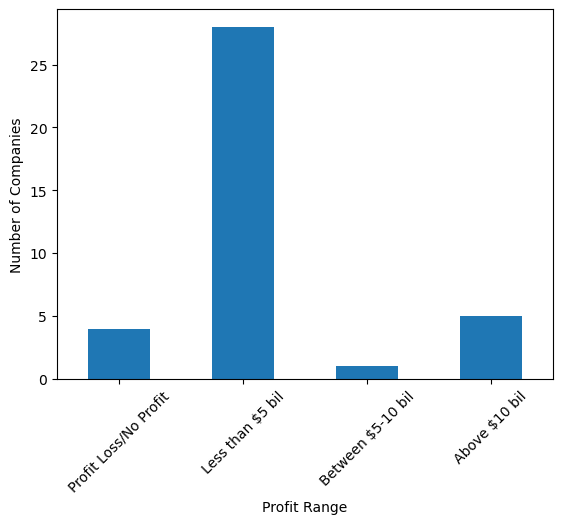

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         28
Between $5-10 bil         1
Above $10 bil             5
Name: Profit Range, dtype: int64
           Profits
mean      5.231053
median    1.150000
var     127.065631
std      11.272339
sem       1.828615
min      -0.600000
max      57.200000


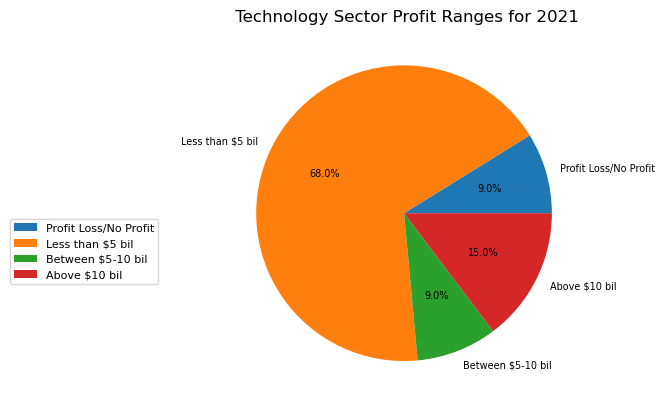

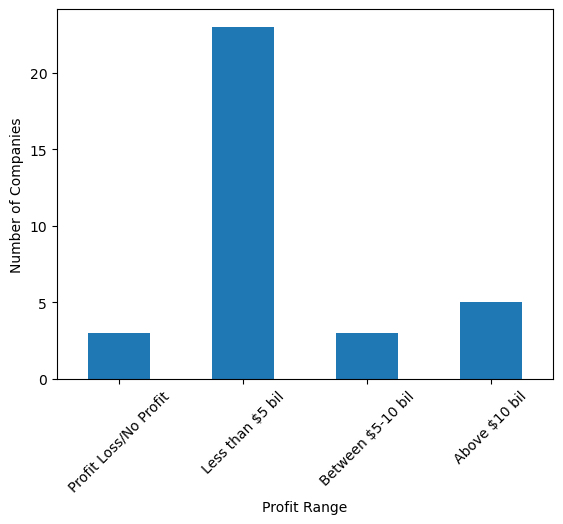

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         23
Between $5-10 bil         3
Above $10 bil             5
Name: Profit Range, dtype: int64
           Profits
mean      6.503235
median    1.600000
var     177.941295
std      13.339464
sem       2.287699
min      -0.430000
max      63.900000


In [68]:
# Using for loop to plot the profit ranges in pie and bar for all years
for year in years:
    profit_year = tech[tech['Year'] == year]
    ranges = profit_year.groupby('Profit Range')['Profit Range'].count()
    plt.pie(ranges.values,labels=ranges.index.values,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',radius=1,textprops={'fontsize': 7})
    plt.title(f" Technology Sector Profit Ranges for {year}", pad=5)
    plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
    plt.savefig(f"Output/tech{year}_pr_pie.png",  bbox_inches='tight')
    plt.show()
    ranges.plot.bar()
    plt.xticks(rotation=45, ha='center')
    plt.ylabel('Number of Companies')
    plt.xlabel('Profit Range')
    plt.savefig(f"Output/tech{year}_pr_bar.png",  bbox_inches='tight')
    plt.show()    
    info = profit_year.aggregate({'Profits':["mean",
                                "median", "var", "std", "sem", "min", "max"]})    
    print(ranges)
    print(info)

The above pie plots show that during the 2008 Housing Crisis, the technology sector did not have a significant impact.  Although more companies showed a profit loss, there was also an increase in companies that made over 5 billion.  While in 2020, during the Covid19 Pandemic, it shows only a few companies with profit loss and more companies with over 5 billion in profit.  The maximum profit for technology also mostly increased over the years and the minimum profit mostly decreased over the years.  It appears that neither the 2008 Housing Crisis or Covid19 Pandemic, impacted the technology sector much. 

In [69]:
# Creating empty lists
loss = []
less = []
between = []
above = []

# using for loop to grab data to append to empty lists
for year in years:
    profits = tech[tech['Year'] == year]
    range = profits.groupby('Profit Range')['Profit Range'].count()
    loss.append(range.iloc[0])
    less.append(range.iloc[1])
    between.append(range.iloc[2])
    above.append(range.iloc[3])

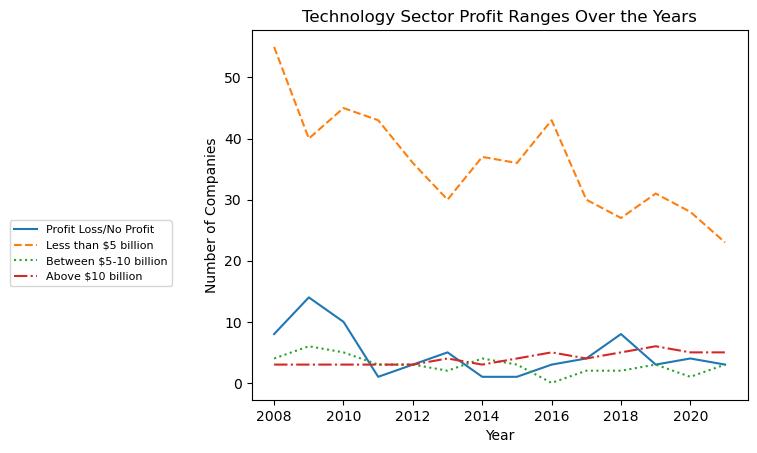

In [70]:
# Multiline plot for profit ranges 
plt.plot(years, loss, label = 'Profit Loss/No Profit', linestyle = '-')
plt.plot(years, less, label = 'Less than $5 billion', linestyle = '--')
plt.plot(years, between, label = 'Between $5-10 billion', linestyle = 'dotted')
plt.plot(years, above, label = 'Above $10 billion', linestyle = 'dashdot')
plt.xticks()
plt.ylabel('Number of Companies')
plt.xlabel('Year')
plt.title('Technology Sector Profit Ranges Over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
plt.savefig(f"Output/tech_pr_yoy.png",  bbox_inches='tight')
plt.show()

In [71]:
# Creating subsets for financials highest and lowest
financials_highest_profits[["Year","Profits"]]
financials_lowest_profits[["Year","Profits"]]

,Year,Profits
20,2008,-7.7800
125,2009,-58.3000
217,2010,-71.9700
307,2011,-14.0000
422,2012,-16.9000
565,2013,-0.6000
630,2014,-0.7000
787,2015,-1.2440
911,2016,-0.6150
1046,2017,-0.8609


In [72]:
# Assigning variables for x and y values
year1 = financials_highest_profits['Year']
highs = financials_highest_profits['Profits']
year2 = financials_lowest_profits['Year']
lows = financials_lowest_profits['Profits']

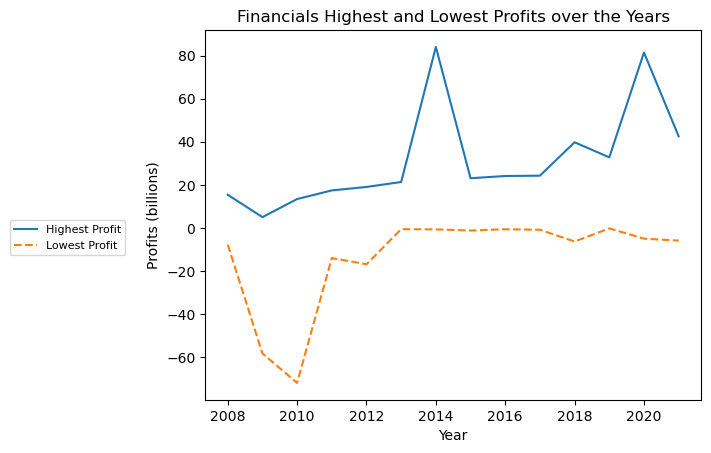

In [73]:
# Plotting multiline for the min and max of financial profits over the years
plt.plot(year1, highs, label = 'Highest Profit', linestyle = '-')
plt.plot(year2, lows, label = 'Lowest Profit', linestyle = '--')
plt.ylabel('Profits (billions)')
plt.xlabel('Year')
plt.title('Financials Highest and Lowest Profits over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
plt.savefig(f"Output/financials_pr_high_low.png",  bbox_inches='tight')
plt.show()

The multiline plot shows a steep decline in a comparison of the financial sector's maximum and minimum profits for 2009, while there was a jump in maximum and minimum profits in 2020.  It appears the financial sector was negatively impacted by the 2008 Housing Crisis and positively impacted by the Covid19 Pandemic. Further research of any other contributing factors needed to determine if the positive impact was only due to the pandemic.

In [74]:
# Creating subset for technology highest and lowest
tech_highest_profits[["Year","Profits"]]
tech_lowest_profits[["Year","Profits"]]

,Year,Profits
17,2008,-29.5800
95,2009,-6.2900
151,2010,-2.4400
233,2011,-0.0860
275,2012,-3.9000
300,2013,-12.9000
370,2014,0.0000
413,2015,-0.0157
439,2016,-4.4795
487,2017,-3.6910


In [75]:
# Assigning variables for x and y values
year1 = tech_highest_profits['Year']
highs = tech_highest_profits['Profits']
year2 = tech_lowest_profits['Year']
lows = tech_lowest_profits['Profits']


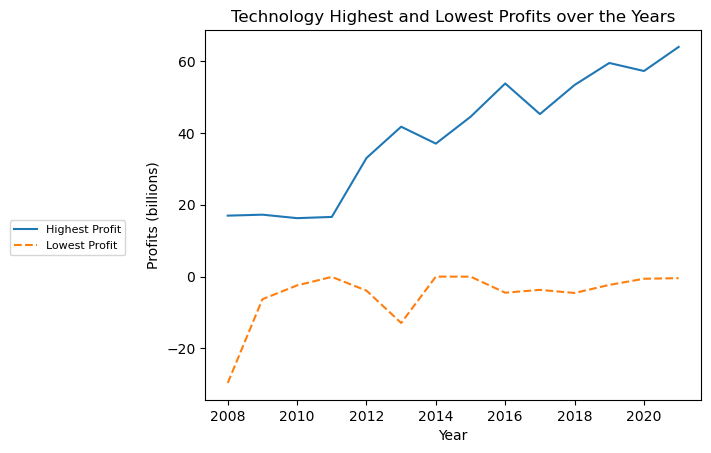

In [76]:
# Plotting multiline for the min and max of technology profits over the years
plt.plot(year1, highs, label = 'Highest Profit', linestyle = '-')
plt.plot(year2, lows, label = 'Lowest Profit', linestyle = '--')
plt.ylabel('Profits (billions)')
plt.xlabel('Year')
plt.title('Technology Highest and Lowest Profits over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
plt.savefig(f"Output/tech_pr_high_low.png",  bbox_inches='tight')
plt.show()

The multiline plot shows an increase in a comparison of the technology sector's maximum and minimum profits for 2009 and an increase in maximum and minimum profits in 2020. It appears that neither crisis impacted the technology sector and over the years, the sector experienced continuous increase.  Further research of any other contributing factors needed to determine if the increase was solely due to the 2008 Housing Crisis or Covid19 pandemic.

In [77]:
# Xiaolin - end of petroleum match here

In [78]:
# Petroleum Sector
# Select the data in petroleum Sector
petroleum = us.loc[(us["Industry"] == 'Oil & Gas Operations')|(us["Industry"] == 'Oil Services & Equipment')
                |(us["Industry"] == 'Natural Gas Utilities')]
petroleum

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,Above $10 bil
16,Chevron,Oil & Gas Operations,United States,179.97,18.69,148.79,203.97,17.0,2008,Above $10 bil
21,ConocoPhillips,Oil & Gas Operations,United States,129.15,11.89,177.76,171.50,22.0,2008,Above $10 bil
143,Valero Energy,Oil & Gas Operations,United States,31.80,5.23,41.86,94.53,144.0,2008,Between $5-10 bil
156,Marathon Oil,Oil & Gas Operations,United States,37.76,3.96,42.75,57.64,157.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
1147,Pioneer Natural Resources,Oil & Gas Operations,United States,32.10,-0.13,20.90,7.00,1148.0,2021,Profit Loss/No Profit
1466,Atmos Energy,Natural Gas Utilities,United States,13.00,0.64,16.50,2.90,1467.0,2021,Less than $5 bil
1545,UGI,Natural Gas Utilities,United States,9.20,0.62,14.70,6.50,1545.0,2021,Less than $5 bil
1679,Hess,Oil & Gas Operations,United States,21.30,-3.10,18.80,4.20,1678.0,2021,Profit Loss/No Profit


In [79]:
# Resetting index
petroleum.reset_index(inplace=True, drop=True)
petroleum

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,Above $10 bil
1,Chevron,Oil & Gas Operations,United States,179.97,18.69,148.79,203.97,17.0,2008,Above $10 bil
2,ConocoPhillips,Oil & Gas Operations,United States,129.15,11.89,177.76,171.50,22.0,2008,Above $10 bil
3,Valero Energy,Oil & Gas Operations,United States,31.80,5.23,41.86,94.53,144.0,2008,Between $5-10 bil
4,Marathon Oil,Oil & Gas Operations,United States,37.76,3.96,42.75,57.64,157.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
517,Pioneer Natural Resources,Oil & Gas Operations,United States,32.10,-0.13,20.90,7.00,1148.0,2021,Profit Loss/No Profit
518,Atmos Energy,Natural Gas Utilities,United States,13.00,0.64,16.50,2.90,1467.0,2021,Less than $5 bil
519,UGI,Natural Gas Utilities,United States,9.20,0.62,14.70,6.50,1545.0,2021,Less than $5 bil
520,Hess,Oil & Gas Operations,United States,21.30,-3.10,18.80,4.20,1678.0,2021,Profit Loss/No Profit


In [80]:
petroleum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company       522 non-null    object  
 1   Industry      522 non-null    object  
 2   Country       522 non-null    object  
 3   Market Value  522 non-null    float64 
 4   Profits       522 non-null    float64 
 5   Assets        522 non-null    float64 
 6   Sales         522 non-null    float64 
 7   Rank          522 non-null    float64 
 8   Year          522 non-null    int64   
 9   Profit Range  522 non-null    category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 37.5+ KB


In [81]:
# Analyze sales data in financial sector, technology sector and petroleum sector
# (Create new dataframes for financials and tech to prevent conflict for further use.)
finance = financials
Tech = tech

# Create a column 'Sector' for each dataframe
finance["Sector"] = "Finance"
Tech["Sector"] = "Tech"
petroleum["Sector"] = "Petroleum"

#three_sector = pd.concat([finance, Tech, petroleum])
#three_sector

In [82]:
# Average sales of each sector for all years
average_sales_finance = finance.groupby(["Year"])["Sales"].mean()
average_sales_tech = Tech.groupby(["Year"])["Sales"].mean()
average_sales_petroleum = petroleum.groupby(["Year"])["Sales"].mean()

# Create a dataframe of the average sales in these three sector
average_sales = pd.DataFrame({"Finance Average Sales":average_sales_finance,
                              "Technology Average Sales":average_sales_tech,
                              "Petroleum Average Sales":average_sales_petroleum})
average_sales

,Finance Average Sales,Technology Average Sales,Petroleum Average Sales
Year,,,
2008,14.355400,16.153857,27.463023
2009,12.373780,17.883810,40.221667
2010,13.169241,16.968413,30.810333
2011,14.490602,17.336000,28.820195
2012,15.042727,21.222222,36.230952
2013,15.066372,23.575610,33.733333
2014,15.392727,21.195556,32.337500
2015,14.548150,22.956841,33.470773
2016,14.171920,21.277784,24.925158


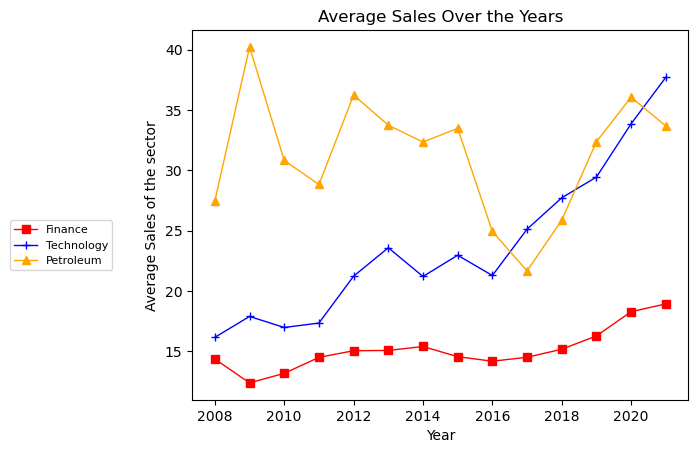

In [83]:
# Plotting multiple lines graph
plt.plot(years, average_sales_finance, marker="s", color="Red", linewidth=1, label="Finance" )
plt.plot(years, average_sales_tech, marker="+", color="blue", linewidth=1, label="Technology" )
plt.plot(years, average_sales_petroleum, marker="^", color="orange", linewidth=1, label="Petroleum" )
plt.xticks()
plt.ylabel('Average Sales of the sector')
plt.xlabel('Year')
plt.title('Average Sales Over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)

In [84]:
# Find highest sales for all years in financial sector
finance_highest_sales = finance.loc[finance.groupby("Year")["Sales"].idxmax()]
finance_highest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
4,Citigroup,Banking,United States,123.440,3.620,2187.630,159.230,24.0,2008,Less than $5 bil,Finance
102,Bank of America,Banking,United States,25.290,4.010,1817.940,113.110,38.0,2009,Less than $5 bil,Finance
183,Bank of America,Banking,United States,167.630,6.280,2223.300,150.450,3.0,2010,Between $5-10 bil,Finance
307,Fannie Mae,Investment Services,United States,0.464,-14.000,3222.000,154.300,790.0,2011,Profit Loss/No Profit,Finance
380,Berkshire Hathaway,Investment Services,United States,202.200,10.300,392.600,143.700,8.0,2012,Above $10 bil,Finance
490,Berkshire Hathaway,Investment Services,United States,252.800,14.800,427.500,162.500,9.0,2013,Above $10 bil,Finance
603,Berkshire Hathaway,Investment Services,United States,309.100,19.500,493.400,178.800,5.0,2014,Above $10 bil,Finance
712,Berkshire Hathaway,Investment Services,United States,354.813,19.872,534.618,194.673,5.0,2015,Above $10 bil,Finance
832,Berkshire Hathaway,Investment Services,United States,360.145,24.083,561.068,210.821,4.0,2016,Above $10 bil,Finance
957,Berkshire Hathaway,Investment Services,United States,409.908,24.074,620.854,222.935,3.0,2017,Above $10 bil,Finance


In [85]:
# Find highest sales for all years in technology sector
Tech_highest_sales = Tech.loc[Tech.groupby("Year")["Sales"].idxmax()]
Tech_highest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
0,AT&T,Telecommunications Services,United States,210.220,11.950,275.640,118.930,12.0,2008,Above $10 bil,Tech
70,AT&T,Telecommunications Services,United States,140.080,12.870,265.250,124.030,7.0,2009,Above $10 bil,Tech
133,AT&T,Telecommunications Services,United States,147.550,12.540,268.750,123.020,13.0,2010,Above $10 bil,Tech
197,Hewlett-Packard,Computer Hardware,United States,90.300,9.100,119.900,127.200,42.0,2011,Between $5-10 bil,Tech
246,Apple,Computer Hardware,United States,546.000,33.000,138.700,127.800,22.0,2012,Above $10 bil,Tech
291,Apple,Computer Hardware,United States,416.600,41.700,196.100,164.700,15.0,2013,Above $10 bil,Tech
332,Apple,Computer Hardware,United States,483.100,37.000,225.200,173.800,15.0,2014,Above $10 bil,Tech
377,Apple,Computer Hardware,United States,741.782,44.462,261.894,199.378,12.0,2015,Above $10 bil,Tech
421,Apple,Computer Hardware,United States,585.951,53.731,293.284,233.273,8.0,2016,Above $10 bil,Tech
472,Apple,Computer Hardware,United States,752.039,45.217,331.141,217.481,9.0,2017,Above $10 bil,Tech


In [86]:
# Find highest sales for all years in petroleum sector
petroleum_highest_sales = petroleum.loc[petroleum.groupby("Year")["Sales"].idxmax()]
petroleum_highest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
0,ExxonMobil,Oil & Gas Operations,United States,465.510,40.61,242.080,358.600,5.0,2008,Above $10 bil,Petroleum
43,ExxonMobil,Oil & Gas Operations,United States,335.540,45.22,228.050,425.700,4.0,2009,Above $10 bil,Petroleum
79,ExxonMobil,Oil & Gas Operations,United States,308.770,19.28,233.320,275.560,4.0,2010,Above $10 bil,Petroleum
109,ExxonMobil,Oil & Gas Operations,United States,407.200,30.50,302.500,341.600,4.0,2011,Above $10 bil,Petroleum
150,Exxon Mobil,Oil & Gas Operations,United States,407.400,41.10,331.100,433.500,1.0,2012,Above $10 bil,Petroleum
192,Exxon Mobil,Oil & Gas Operations,United States,400.400,44.90,333.800,420.700,5.0,2013,Above $10 bil,Petroleum
237,Exxon Mobil,Oil & Gas Operations,United States,422.300,32.60,346.800,394.000,6.0,2014,Above $10 bil,Petroleum
285,Exxon Mobil,Oil & Gas Operations,United States,357.094,32.52,349.493,376.240,7.0,2015,Above $10 bil,Petroleum
329,ExxonMobil,Oil & Gas Operations,United States,363.270,16.15,336.758,236.810,9.0,2016,Above $10 bil,Petroleum
367,ExxonMobil,Oil & Gas Operations,United States,343.165,7.84,330.314,197.518,13.0,2017,Between $5-10 bil,Petroleum


In [87]:
# Find lowest sales for all years in financial sector
finance_lowest_sales = finance.loc[finance.groupby("Year")["Sales"].idxmin()]
finance_lowest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
86,IntercontinentalExchange,Diversified Financials,United States,9.140,0.2400,2.800,0.570,1865.0,2008,Less than $5 bil,Finance
176,Northstar Realty Finance,Diversified Financials,United States,0.130,0.7200,3.940,0.370,1841.0,2009,Less than $5 bil,Finance
247,MFA Financial,Diversified Financials,United States,2.050,0.2700,9.630,0.510,1800.0,2010,Less than $5 bil,Finance
360,American Capital Agency Corp.,Real Estate,United States,2.800,0.2881,14.500,0.253,1827.0,2011,Less than $5 bil,Finance
481,MBIA,Diversified Insurance,United States,1.900,-1.3000,26.900,-1.600,1926.0,2012,Profit Loss/No Profit,Finance
599,Alexander's,Real Estate,United States,1.700,0.7000,1.500,0.200,1990.0,2013,Less than $5 bil,Finance
692,Two Harbors Investment,Real Estate,United States,3.800,0.6000,17.200,0.600,1543.0,2014,Less than $5 bil,Finance
793,Annaly Capital Management,Real Estate,United States,9.970,-0.8421,88.355,-0.115,1235.0,2015,Profit Loss/No Profit,Finance
929,Ambac Financial Group,Diversified Insurance,United States,0.761,0.4934,24.359,0.638,1492.0,2016,Less than $5 bil,Finance
1070,Two Harbors Investment,Real Estate,United States,3.360,0.3533,20.112,0.741,1866.0,2017,Less than $5 bil,Finance


In [88]:
# Find lowest sales for all years in technology sector
Tech_lowest_sales = Tech.loc[Tech.groupby("Year")["Sales"].idxmin()]
Tech_lowest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
59,First Solar,Technology Hardware & Equip,United States,16.140,0.1600,1.370,0.500,1717.0,2008,Less than $5 bil,Tech
128,Microchip Technology,Semiconductors,United States,3.420,0.3000,2.450,0.990,1754.0,2009,Less than $5 bil,Tech
185,Clearwire,Telecommunications Services,United States,6.330,-0.3300,11.270,0.270,1657.0,2010,Profit Loss/No Profit,Tech
238,Linear Technology,Semiconductors,United States,7.600,0.5061,1.400,1.400,1551.0,2011,Less than $5 bil,Tech
290,F5 Networks,Computer Services,United States,10.400,0.3000,1.700,1.200,1950.0,2012,Less than $5 bil,Tech
330,LinkedIn,Computer Services,United States,19.100,0.0000,1.400,1.000,1736.0,2013,Profit Loss/No Profit,Tech
364,Linear Technology,Semiconductors,United States,11.900,0.4000,2.300,1.300,1563.0,2014,Less than $5 bil,Tech
411,Linear Technology,Semiconductors,United States,11.060,0.5004,1.729,1.437,1597.0,2015,Less than $5 bil,Tech
470,"Palo Alto Networks,",Communications Equipment,United States,13.125,-0.1931,2.317,1.150,1995.0,2016,Profit Loss/No Profit,Tech
510,F5 Networks,Computer Services,United States,8.878,0.3704,2.397,2.022,1979.0,2017,Less than $5 bil,Tech


In [89]:
# Find lowest sales for all years in petroleum sector
petroleum_lowest_sales = petroleum.loc[petroleum.groupby("Year")["Sales"].idxmin()]
petroleum_lowest_sales

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range,Sector
34,Quicksilver Resources,Oil & Gas Operations,United States,5.450,0.4800,2.780,0.560,1721.0,2008,Less than $5 bil,Petroleum
78,Continental Resources,Oil & Gas Operations,United States,2.690,0.3200,2.220,0.960,1929.0,2009,Less than $5 bil,Petroleum
106,Pride International,Oil & Gas Operations,United States,4.890,0.2900,6.140,1.590,1725.0,2010,Less than $5 bil,Petroleum
145,EXCO Resources,Oil & Gas Operations,United States,4.400,0.6719,3.500,0.515,1817.0,2011,Less than $5 bil,Petroleum
191,Rowan Cos,Oil & Gas Operations,United States,4.600,0.7000,6.600,0.900,1793.0,2012,Less than $5 bil,Petroleum
231,Cabot Oil & Gas,Oil & Gas Operations,United States,14.100,0.1000,4.600,1.200,1869.0,2013,Less than $5 bil,Petroleum
278,Cabot Oil & Gas,Oil & Gas Operations,United States,14.300,0.3000,5.000,1.700,1811.0,2014,Less than $5 bil,Petroleum
322,Range Resources,Oil & Gas Operations,United States,9.234,0.6237,8.747,2.169,1578.0,2015,Less than $5 bil,Petroleum
366,Columbia Pipeline Group,Oil & Gas Operations,United States,10.254,0.2672,10.363,1.335,1920.0,2016,Less than $5 bil,Petroleum
399,Penn Virginia,Oil & Gas Operations,United States,0.732,1.0493,0.292,0.132,1771.0,2017,Less than $5 bil,Petroleum
